# **Importing Packages**

Make sure to install the packages before importing if needed.

In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gseapy as gp
import seaborn as sns
import os
import re
import glob
#import bbknn
import joypy
import igraph
import leidenalg
import mygene

from scipy import sparse
from scipy.stats import gaussian_kde
from textwrap import fill
from matplotlib import cm

# **Loading Data**

To see requirements for all AnnData objects (CELLxCELL): https://github.com/chanzuckerberg/single-cell-curation/blob/main/schema/7.0.0/schema.md.

In [2]:
## Emplacement pour elodie 
#adata = sc.read_h5ad("/Users/elodiehusson/Desktop/AD & PD/77k_AD_PD_CTRL.h5ad")
## Path Yara 
adata = sc.read_h5ad("C:/Users/yarad/Desktop/x/Masters/Master BMC - Sorbonne/M2/Single Cell/Project/Coding Project/77k_AD_PD_CTRL.h5ad")

# ajoutez vos emplacements ici du fichier, et juste mettez en commentaires les autres
# adata = sc.read_h5ad(".../.../subset_AD_PD_CTRL.h5ad")

adata_raw = adata.copy()

In [51]:
adata.var_keys

<bound method AnnData.var_keys of AnnData object with n_obs × n_vars = 77052 × 34176
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_t

The studied conditions are the following:

In [42]:
x = adata.obs.groupby(["disease", "AD_status", "Parkinson_disease"]).size()

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_34276/385958126.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = adata.obs.groupby(["disease", "AD_status", "Parkinson_disease"]).size()


## **Reduced Dataset's Metadata**

scanpy shows a structured summary:

In [43]:
adata

AnnData object with n_obs × n_vars = 77052 × 34176
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'sche

In [44]:
# This is the sparse matrix
print("adata.X type is :",type(adata.X))

print(adata.X[:5, :5])

adata.X type is : <class 'scipy.sparse._csr.csr_matrix'>
<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 3 stored elements and shape (5, 5)>
  Coords	Values
  (0, 2)	1.0
  (4, 2)	3.0
  (4, 4)	1.0


In [45]:
print(f"The variable adata has the following shape: {adata.shape}.")
print(f"There are {adata.shape[0]} cells and {adata.shape[1]} genes in this dataset.")

The variable adata has the following shape: (77052, 34176).
There are 77052 cells and 34176 genes in this dataset.


In [46]:
donors_per_disease = pd.crosstab(adata.obs["donor_id"],adata.obs["disease"])
donors_per_disease_summary = donors_per_disease.sum()

print("Number of donors per disease status:")
print(donors_per_disease_summary)

Number of donors per disease status:
disease
dementia || Alzheimer disease    31949
dementia || Parkinson disease     7772
normal                           37331
dtype: int64


In [47]:
print("The keys of adata.obs are the following:", adata.obs.keys())

adata.obs.head()

The keys of adata.obs are the following: Index(['Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'AD_status',
       'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status',
       'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder',
       'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry',
       'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')


Source  n_genes  n_counts  class subclass  \
barcodekey                                                                  
Donor_333-1-GTCTGTCGTTCTCCTG-1       R     3117    6236.0  Oligo    Oligo   
Donor_1001-1-ACTTTGTGTTACCGTA-1      R     1026    1444.0  Astro    Astro   
Donor_638-1-ACCCTTGTCCTTTAGT-0       R     3025    6086.0   Endo     Endo   
Donor_865-1-TGTGAGTAGAAAGTCT-0       R     3142    6582.0  Astro    Astro   
Donor_865-1-AGATGCTAGTCTTCCC-0       R     6149   27425.0     IN   IN_SST   

                                      subtype tissue_ontology_term_id  \
barcodekey                                                              
Donor_333-1-GTCTGTCGTTCTCCTG-1   Oligo_OPALIN          UBERON:0009834   
Donor_1001-1-ACTTTGTGTTACCGTA-1    Astro_WIF1          UBERON:0009834   
Donor_638-1-ACCCTTGTCCTTTAGT-0     Endo_IL1R1          UBERON:0009834   
Donor_865-1-TGTGAGTAGAAAGTCT-0   Astro_PLSCR1          UBERON:0009834   
Donor_865-1-AGATGCTAGTCTTCCC-0   IN_SST_EDNRA          UBERON:0009834   

                                tissue_type assay_ontology_term_id  \
barcodekey                                                           
Donor_333-1-GTCTGTCGTTCTCCTG-1       tissue            EFO:0009922   
Donor_1001-1-ACTTTGTGTTACCGTA-1      tissue            EFO:0009922   
Donor_638-1-ACCCTTGTCCTTTAGT-0       tissue            EFO:0009922   
Donor_865-1-TGTGAGTAGAAAGTCT-0       tissue            EFO:0009922   
Donor_865-1-AGATGCTAGTCTTCCC-0       tissue            EFO:0009922   

                                cell_type_ontology_term_id  ...  \
barcodekey                                                  ...   
Donor_333-1-GTCTGTCGTTCTCCTG-1                  CL:0000128  ...   
Donor_1001-1-ACTTTGTGTTACCGTA-1                 CL:0000127  ...   
Donor_638-1-ACCCTTGTCCTTTAGT-0                  CL:0000115  ...   
Donor_865-1-TGTGAGTAGAAAGTCT-0                  CL:0000127  ...   
Donor_865-1-AGATGCTAGTCTTCCC-0                  CL:4023017  ...   

                                genetic_ancestry  \
barcodekey                                         
Donor_333-1-GTCTGTCGTTCTCCTG-1        East Asian   
Donor_1001-1-ACTTTGTGTTACCGTA-1            Asian   
Donor_638-1-ACCCTTGTCCTTTAGT-0        East Asian   
Donor_865-1-TGTGAGTAGAAAGTCT-0        East Asian   
Donor_865-1-AGATGCTAGTCTTCCC-0        East Asian   

                                       disease_ontology_term_id  \
barcodekey                                                        
Donor_333-1-GTCTGTCGTTCTCCTG-1   MONDO:0001627 || MONDO:0004975   
Donor_1001-1-ACTTTGTGTTACCGTA-1  MONDO:0001627 || MONDO:0004975   
Donor_638-1-ACCCTTGTCCTTTAGT-0   MONDO:0001627 || MONDO:0004975   
Donor_865-1-TGTGAGTAGAAAGTCT-0   MONDO:0001627 || MONDO:0004975   
Donor_865-1-AGATGCTAGTCTTCCC-0   MONDO:0001627 || MONDO:0004975   

                                                          cell_type  \
barcodekey                                                            
Donor_333-1-GTCTGTCGTTCTCCTG-1                      oligodendrocyte   
Donor_1001-1-ACTTTGTGTTACCGTA-1                           astrocyte   
Donor_638-1-ACCCTTGTCCTTTAGT-0                     endothelial cell   
Donor_865-1-TGTGAGTAGAAAGTCT-0                            astrocyte   
Donor_865-1-AGATGCTAGTCTTCCC-0   sst GABAergic cortical interneuron   

                                     assay                        disease  \
barcodekey                                                                  
Donor_333-1-GTCTGTCGTTCTCCTG-1   10x 3' v3  dementia || Alzheimer disease   
Donor_1001-1-ACTTTGTGTTACCGTA-1  10x 3' v3  dementia || Alzheimer disease   
Donor_638-1-ACCCTTGTCCTTTAGT-0   10x 3' v3  dementia || Alzheimer disease   
Donor_865-1-TGTGAGTAGAAAGTCT-0   10x 3' v3  dementia || Alzheimer disease   
Donor_865-1-AGATGCTAGTCTTCCC-0   10x 3' v3  dementia || Alzheimer disease   

                                    sex                          tissue  \
barcodekey                                                             

In [48]:
print("Donor Names : \n", adata.obs_names)

print("Gene Names : \n", adata.var_names) # These are Ensembl IDs

Donor Names : 
 Index(['Donor_333-1-GTCTGTCGTTCTCCTG-1', 'Donor_1001-1-ACTTTGTGTTACCGTA-1',
       'Donor_638-1-ACCCTTGTCCTTTAGT-0', 'Donor_865-1-TGTGAGTAGAAAGTCT-0',
       'Donor_865-1-AGATGCTAGTCTTCCC-0', 'Donor_1007-1-GCCCAGATCAAAGACA-0',
       'Donor_865-2-GTAGAAAAGAATTGTG-1', 'Donor_1001-1-TTGTTCACACGCACCA-1',
       'Donor_638-2-CTTTCGGAGAAACTAC-1', 'Donor_31-1-GGGACTCAGGTAGTAT-0',
       ...
       'Donor_721-1-TTGGGCGAGATGACCG-0', 'Donor_634-2-CAGATCATCACTCCGT-0',
       'Donor_735-2-AGATGCTCAAGTGACG-1', 'Donor_1278-1-GACCAATTCTCGTCAC-0',
       'Donor_634-2-TACCTGCCAGAGTAAT-0', 'Donor_735-1-CCTCTCCAGCAACCAG-0',
       'Donor_1278-1-CATTCCGCAGCTGTCG-0', 'Donor_721-2-CACTTCGGTAGTCTGT-1',
       'Donor_634-2-ACGATCATCATGAAAG-0', 'Donor_721-1-AAGCGAGCAGCGTACC-0'],
      dtype='object', name='barcodekey', length=77052)
Gene Names : 
 Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000

In [49]:
disease_list = list(adata.obs["disease"].cat.categories)

print("The types of disease in this dataset are :", disease_list)

The types of disease in this dataset are : ['dementia || Alzheimer disease', 'dementia || Parkinson disease', 'normal']


The number of cells per disease type in this dataset:

In [50]:
for disease_type in disease_list : 

    print(len(adata.obs["disease"][adata.obs["disease"] == disease_type]), " cells :", disease_type)

31949  cells : dementia || Alzheimer disease
7772  cells : dementia || Parkinson disease
37331  cells : normal


Gene metadata:

In [51]:
print("adata.var.keys :", adata.var.keys())

print("First 5 rows from adata.var:")
print(adata.var.head(5))

adata.var.keys : Index(['gene_name', 'n_cells', 'feature_is_filtered', 'feature_name',
       'feature_reference', 'feature_biotype', 'feature_length',
       'feature_type'],
      dtype='object')
First 5 rows from adata.var:
                gene_name  n_cells  feature_is_filtered feature_name  \
ENSG00000000003    TSPAN6   256237                False       TSPAN6   
ENSG00000000005      TNMD    21369                False         TNMD   
ENSG00000000419      DPM1  3001206                False         DPM1   
ENSG00000000457     SCYL3  1941205                False        SCYL3   
ENSG00000000460  C1orf112  1798664                False        FIRRM   

                feature_reference feature_biotype feature_length  \
ENSG00000000003    NCBITaxon:9606            gene           2396   
ENSG00000000005    NCBITaxon:9606            gene            873   
ENSG00000000419    NCBITaxon:9606            gene           1262   
ENSG00000000457    NCBITaxon:9606            gene           2916   


#### **Existing Embeddings**
It would be interesting and informative to compare existing embeddings to our results.

In [52]:
# Embeddings (UMAP, PCA...)
print("adata.obsm.keys :", adata.obsm.keys())

# Other information
print("adata.uns.keys :", adata.uns.keys())

adata.obsm.keys : KeysView(AxisArrays with keys: X_umap)
adata.uns.keys : dict_keys(['batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'subclass_colors', 'subtype_colors', 'title', 'uid'])


Based on the existing UMAPs, there does not seem to be a batch effect in our data. Remove the # to view the corresponding UMAP:

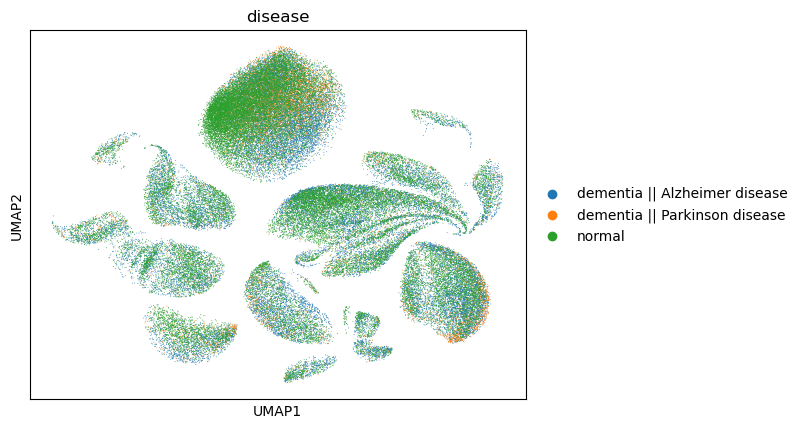

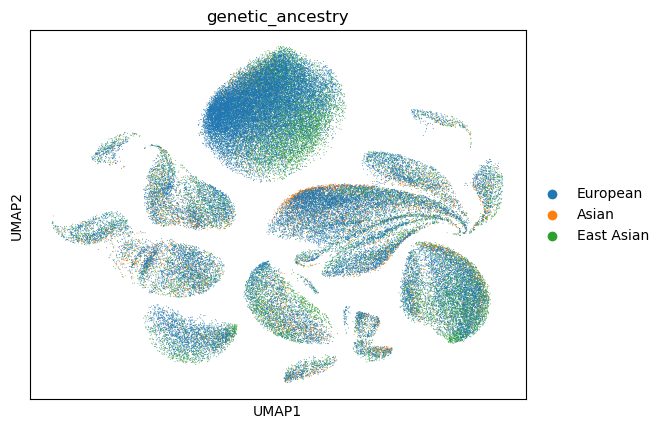

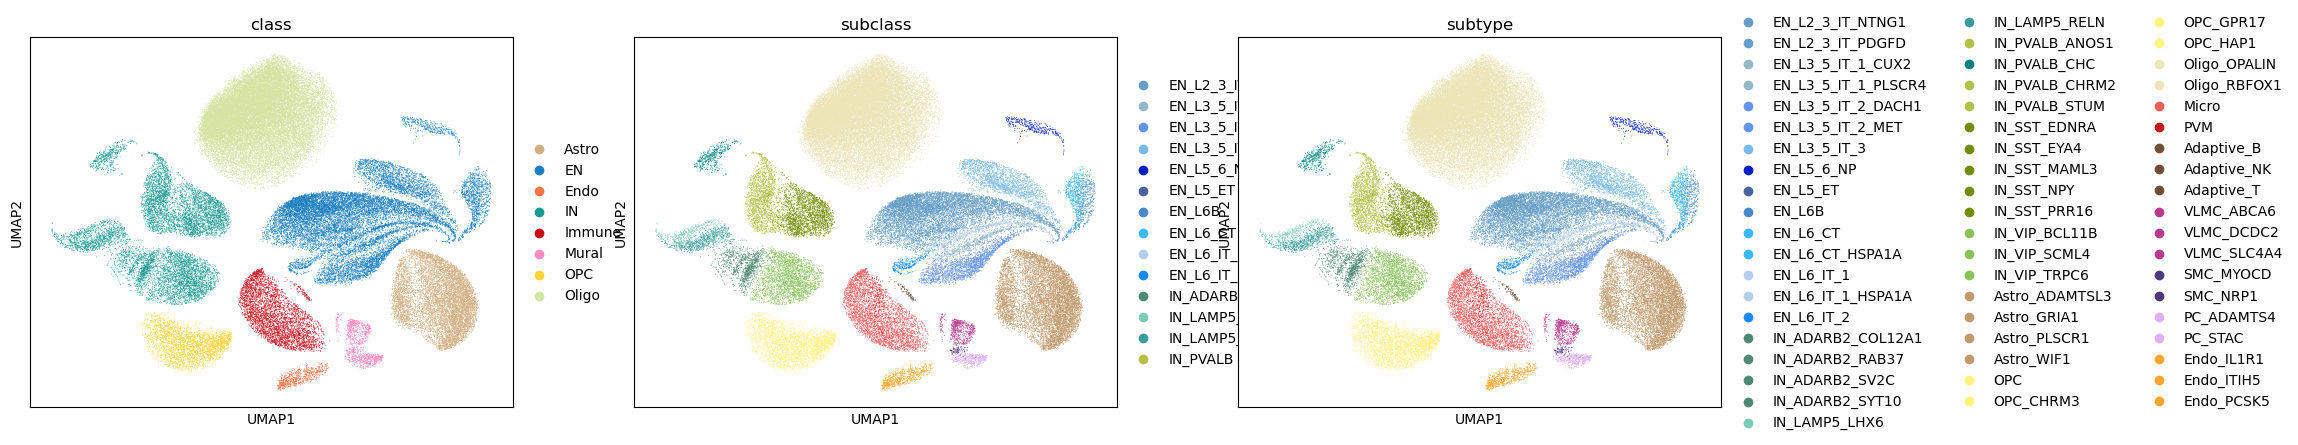

In [53]:
# sc.pl.umap(adata, color = 'cell_type')
sc.pl.umap(adata, color = 'disease')
sc.pl.umap(adata, color = 'genetic_ancestry')

# sc.pl.umap(adata, color = 'AD_status')
# sc.pl.umap(adata, color = 'sex')
# sc.pl.umap(adata, color = 'subclass')
# sc.pl.umap(adata, color = ['cell_type', 'subclass'])
sc.pl.umap(adata, color = ['class', 'subclass', 'subtype'])

In [54]:
del adata.obsm["X_umap"]

# **RNAseq pipeline**

## 1. Quality Check

### a - Visualization of QC metrics

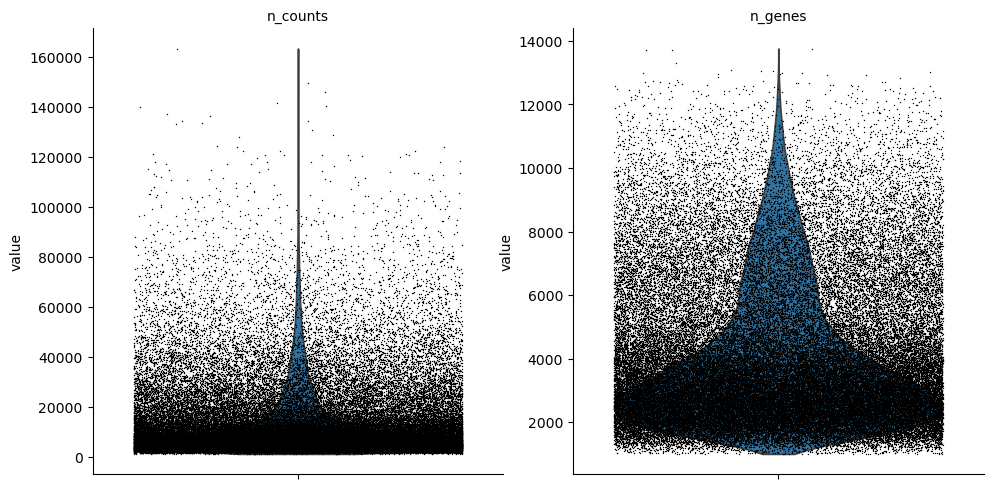

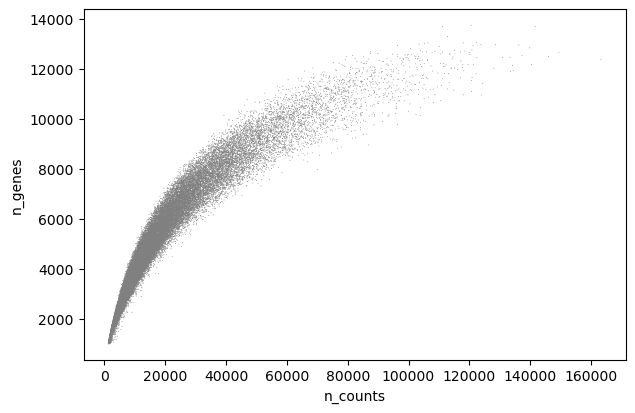

In [55]:
# 1. Calculation of QC metrics and addition to adata.obs
sc.pp.calculate_qc_metrics(adata, inplace = True)

# 2. Visualization of QC metrics before filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # Violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)

sc.pl.scatter(adata, x = 'n_counts', y = 'n_genes') # Scatter plot of number of genes vs. number of counts

### b - Filtering out low quality cells

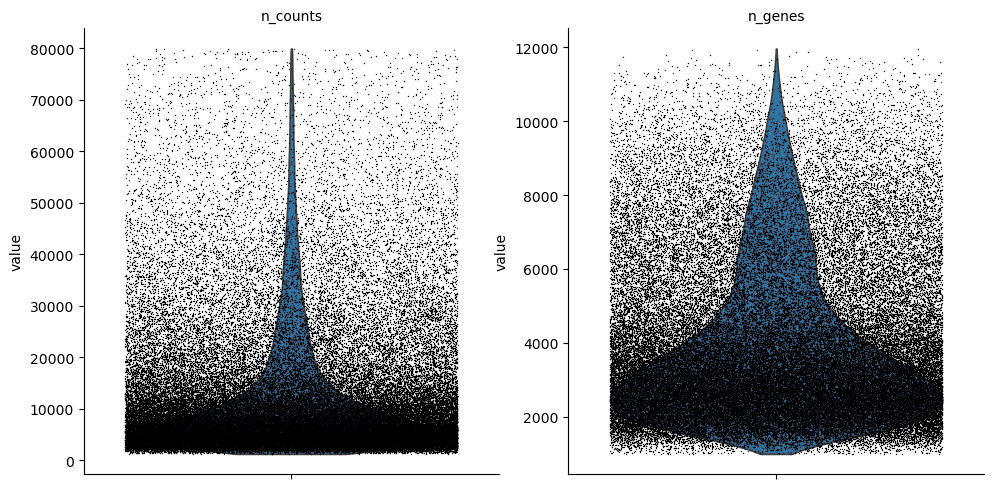

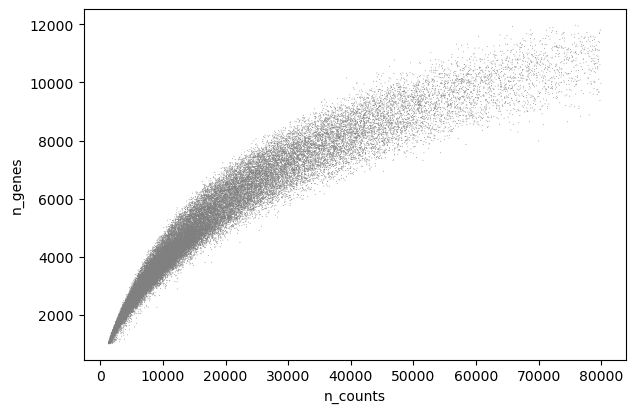

In [3]:
# 3. Application of filters
adata = adata[adata.obs['n_genes'] < 12000, :] # cutoff chosen: 12 000 genes

adata = adata[adata.obs['n_counts'] < 80000, :] # cutoff chosen: 80 000 counts

# 4. Visualization of QC metrics after filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)

sc.pl.scatter(adata, x = 'n_counts', y = 'n_genes') # Scatter plot of number of genes vs. number of counts

### c - Filtering out mitochondrial genes

In [4]:
# Counting the number of mitochondrial genes
adata.var["mt"] = adata.var['gene_name'].str.startswith("MT-")

# Calculating QC metrics including the percentage of mitochondrial genes and adding them to adata.obs
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars = ["mt"],
    inplace = True,
    log1p = True
)

C:\Users\yarad\AppData\Local\Temp\ipykernel_12012\4025084783.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["mt"] = adata.var['gene_name'].str.startswith("MT-")


KeyboardInterrupt: 

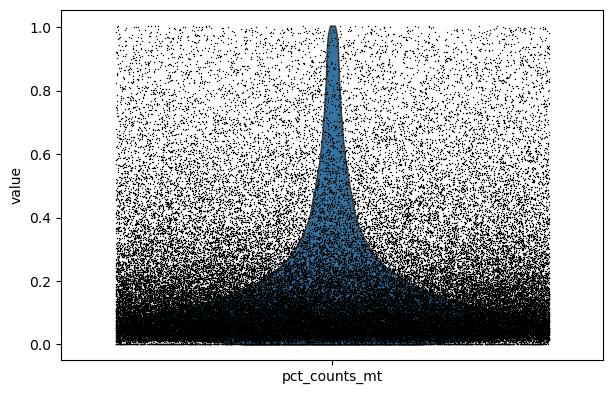

In [58]:
# Visualization of the percentage of mitochondrial genes
sc.pl.violin(
    adata,
    keys='pct_counts_mt',
    jitter = 0.4,
    rotation=  0,   
    stripplot = True,
    show = True
)

# data was already filtered on pct_counts_mt 
# it's weird because even before the filtering there was no cell with >10%. 
# They must have been filtered before
# I still keep the line just in case
# Filtering cells with more than 10% mitochondrial gene expression
adata_hvgadata = adata[adata.obs['pct_counts_mt'] < 10, :]


Here, we note that there were no cells with more than 10% mitochondrial gene expression in the dataset even before we applied our own filter. This means that the dataset did not contain such cells, either because of the nature of the data or because the dataset was already treated and filtered.

### d - Excluding ribosomal and hemoglobin genes
We will be keeping ribosomal genes, which make up 1.5% of genes expressed, and filtering out hemoglobin genes.

In [5]:
# Ribosomal genes
adata.var["ribo"] = adata.var['gene_name'].str.startswith(("RPS", "RPL"))
print("proportion of ribo genes in all expressed genes : ", adata.var["ribo"].sum()/len(adata.var)*100)

# Hemoglobin genes
adata.var["hb"] = adata.var['gene_name'].str.contains("^HB[^(P)]")
print("Number of hemo genes before deletion : ", adata.var["hb"].sum())

# Confirming that hb genes were properly removed
genes_to_keep = ~adata.var["hb"]
adata = adata[:, genes_to_keep].copy()
print("Number of hemo genes after deletion: ", adata.var["hb"].sum())

C:\Users\yarad\AppData\Local\Temp\ipykernel_12012\3658450869.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["ribo"] = adata.var['gene_name'].str.startswith(("RPS", "RPL"))


proportion of ribo genes in all expressed genes :  1.5127574906367043
Number of hemo genes before deletion :  9
Number of hemo genes after deletion:  0


### e - important : apply the filtering on adata_raw

In [6]:
adata_raw = adata_raw[adata.obs_names, adata.var_names].copy() 

MemoryError: Unable to allocate 1.13 GiB for an array with shape (303142308,) and data type float32

## 2. Normalization

The dataset is in raw counts

In [ ]:
# we can see that this is a sparse matrix, without normalized values
adata.X[:5, :10].toarray()

array([[0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 4., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 3., 0., 1., 0., 0., 0., 2., 0.]], dtype=float32)

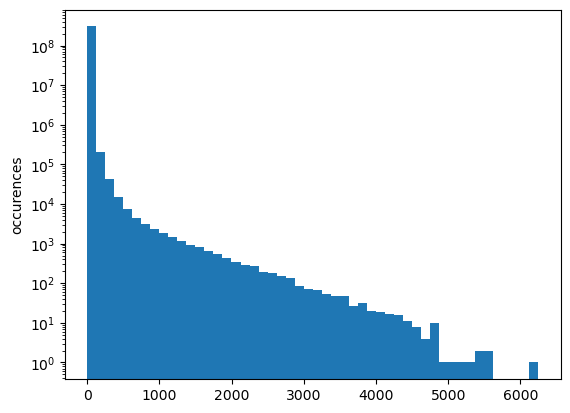

In [62]:
plt.hist(adata.X.data, bins=50, log = True)
plt.ylabel("occurences")
plt.show()

Normalization using log1p

In [63]:
sc.pp.log1p(adata)

## 3. Highly Variable Genes (HVGs)

we kept 3000 highly variable genes out of 34167 genes


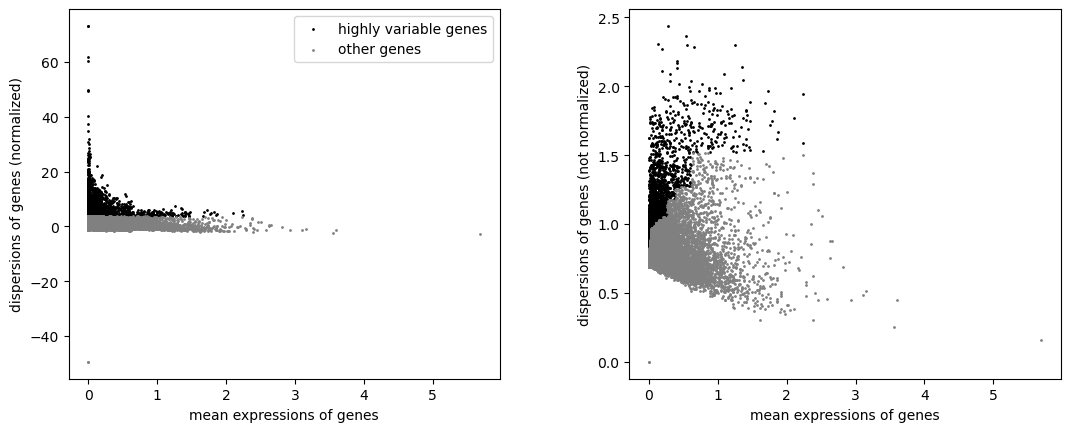

In [64]:
nHVG = 3000 

sc.pp.highly_variable_genes(
    adata, 
    flavor='cell_ranger',
    n_top_genes=nHVG
)

print("we kept", nHVG, "highly variable genes out of", adata.shape[1], "genes")
sc.pl.highly_variable_genes(adata)

In [65]:
adata.var['highly_variable'].value_counts()

highly_variable
False    31167
True      3000
Name: count, dtype: int64

new AnnData object with the HVG only

In [66]:
adata_hvg = adata[:, adata.var['highly_variable']].copy()

## 4. Scaling & PCA

In [67]:
# Scaling (3s)
sc.pp.scale(adata_hvg, max_value = 10)

/opt/anaconda3/envs/scanpy310/lib/python3.10/functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


In [68]:
# PCA (1min30)
sc.tl.pca(adata_hvg)

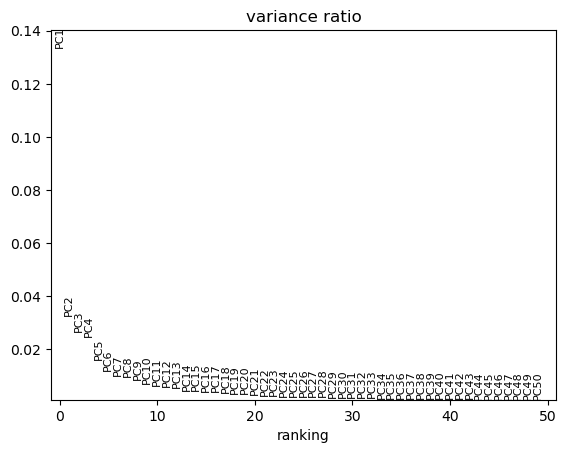

In [69]:
sc.pl.pca_variance_ratio(adata_hvg, n_pcs = 50) # elbow plot to see how many PCs to keep

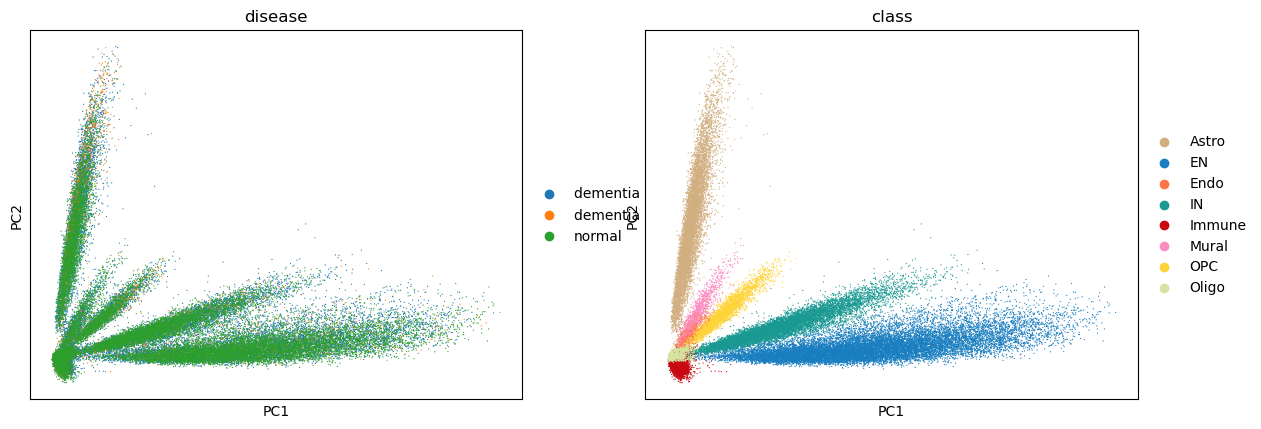

In [70]:
sc.pl.pca(
    adata_hvg,
    color = ["disease", "class"],
    ncols = 3,
    size = 3)

## 5. Batch effect correction

In [ ]:
# 37 sec
# bbknn.bbknn(adata_hvg, batch_key='donor_id')
sc.external.pp.bbknn(adata_hvg, batch_key="donor_id")

/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 6. Clustering

In [ ]:
adata_hvg.obs["class"].value_counts()

class
Oligo     29919
EN        17717
IN        10258
Astro      9235
Immune     4270
OPC        3085
Mural      1348
Endo        740
Name: count, dtype: int64

In [ ]:
donors_by_class_and_subclass = (adata_hvg.obs.groupby(["class", "subclass"], observed=True)["donor_id"].nunique())
donors_by_class_and_subclass

class   subclass     
Astro   Astro            17
EN      EN_L2_3_IT       17
        EN_L3_5_IT_1     17
        EN_L3_5_IT_2     17
        EN_L3_5_IT_3     17
        EN_L5_6_NP       16
        EN_L5_ET          5
        EN_L6B           16
        EN_L6_CT         16
        EN_L6_IT_1       16
        EN_L6_IT_2       15
Endo    Endo             17
IN      IN_ADARB2        17
        IN_LAMP5_LHX6    17
        IN_LAMP5_RELN    17
        IN_PVALB         17
        IN_PVALB_CHC     17
        IN_SST           17
        IN_VIP           17
Immune  Micro            17
        PVM              16
        Adaptive         12
Mural   VLMC             16
        SMC              13
        PC               17
OPC     OPC              17
Oligo   Oligo            17
Name: donor_id, dtype: int64

### Neighbors

In [ ]:
# 25 sec
# number of neighbors
# we chose 30 PCs because after that the variance ratio doesn't decrease that much
nPC = 30

sc.pp.neighbors(
    adata_hvg,
    n_neighbors=30,      # plus grand → structure plus globale, moins de petits fragments
    n_pcs=nPC,            # tu peux monter à 40–50 si tu veux
    metric="euclidean",
    random_state=42,
)

### Clustering

In [ ]:
sc.tl.leiden(adata_hvg, resolution = 0.02)

print("Number of clusters :", len(adata_hvg.obs['leiden'].cat.categories))

Number of clusters : 10


### UMAP

In [ ]:
# 2 min 46
sc.tl.umap(
    adata_hvg,
    min_dist=0.8,        # 0.8 au lieu de 0.5 → clusters un peu plus serrés
    random_state=40,
)

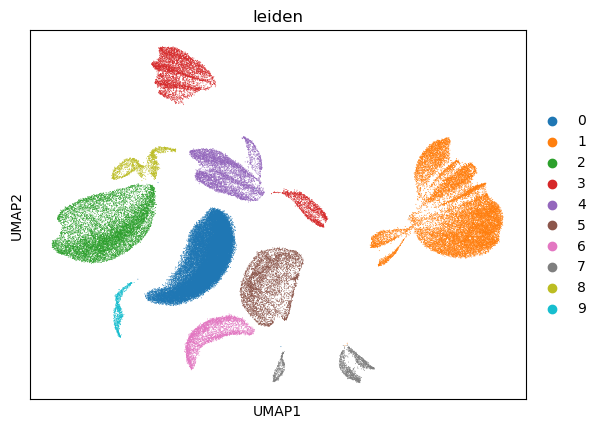

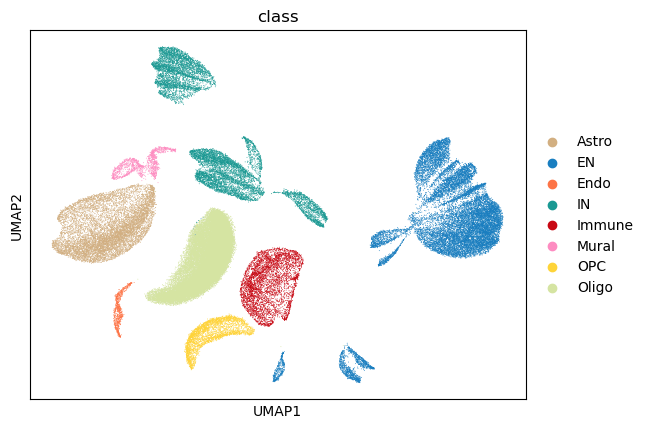

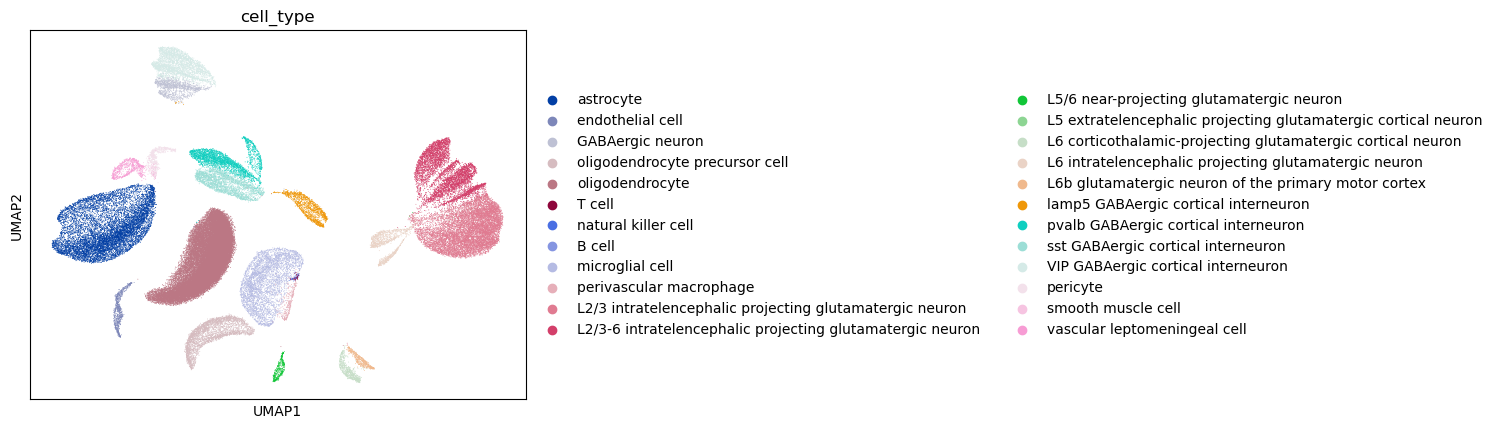

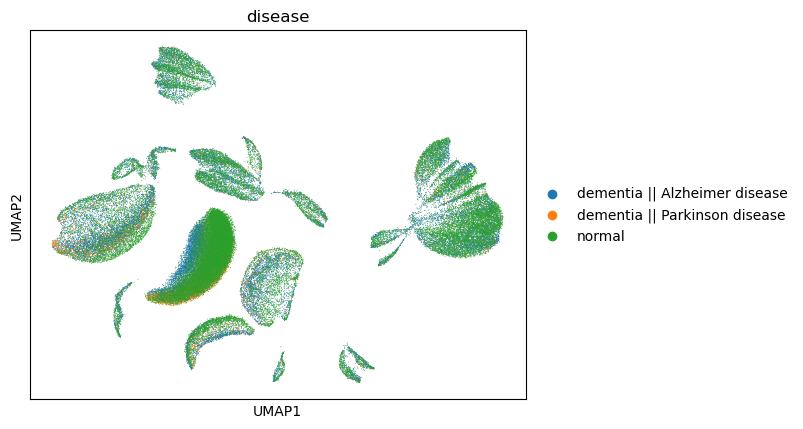

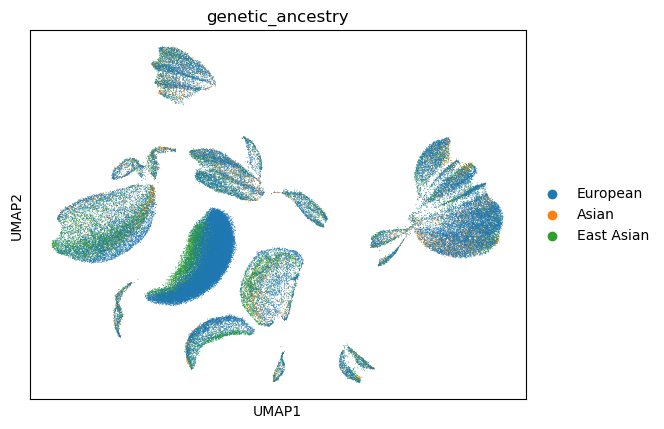

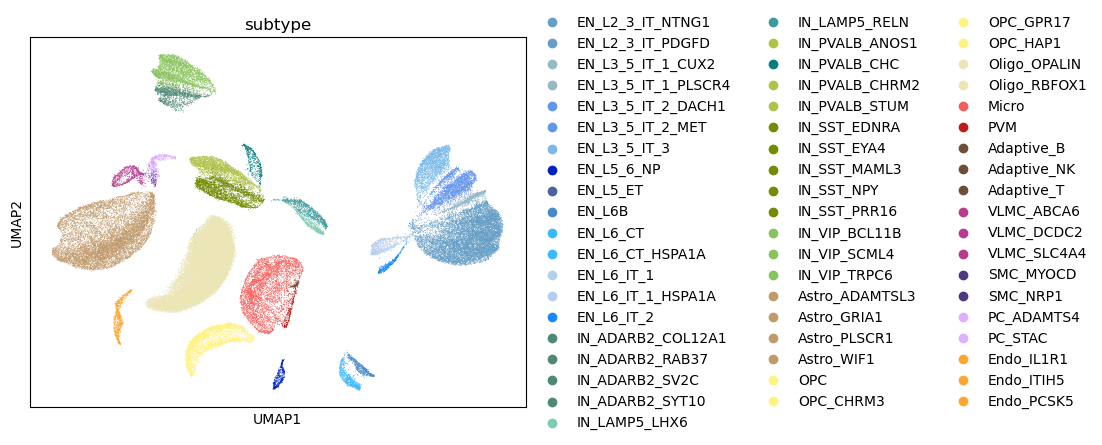

In [ ]:

sc.pl.umap(adata_hvg, color="leiden")

sc.pl.umap(adata_hvg, color="class")

sc.pl.umap(adata_hvg, color='cell_type')

sc.pl.umap(adata_hvg, color="disease")
sc.pl.umap(adata_hvg, color="genetic_ancestry")

sc.pl.umap(adata_hvg, color='subtype')

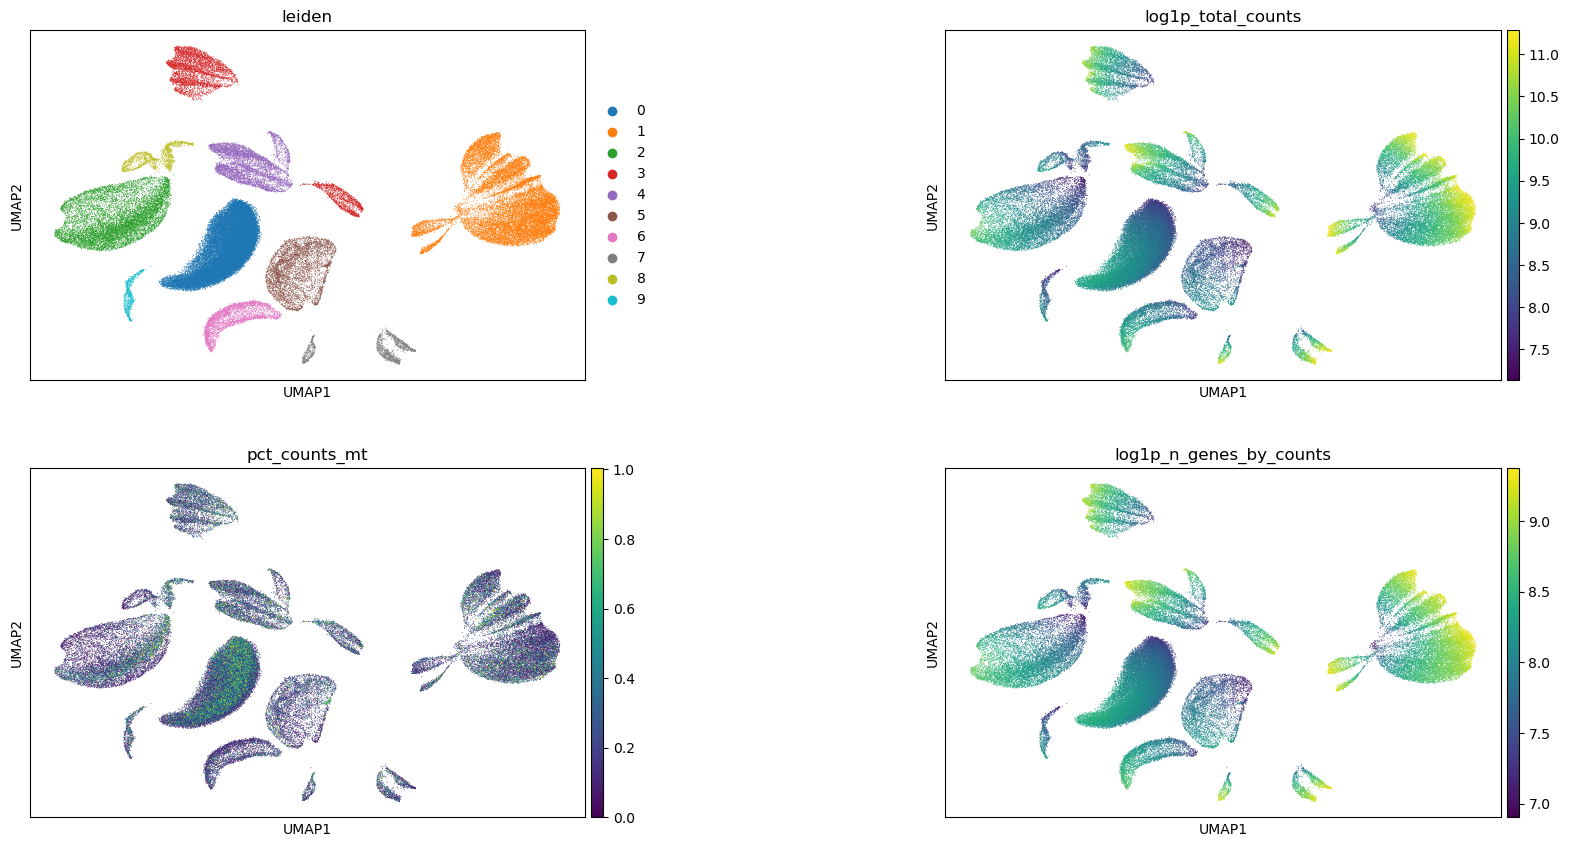

In [ ]:
sc.pl.umap(
    adata_hvg,
    color = ["leiden", "log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],
    wspace = 0.5,
    ncols = 2,
)

## 7. Manual Annotation

#### Marker gene set
We first define known marker genes of the cell types that we think are represented by the clusters. We only keep the genes in that list that are found in our data.

In [ ]:
# Define marker genes for each cell type
marker_genes = {
    "Astrocytes" : ["ENSG00000135821", "ENSG00000125398", "ENSG00000171885", "ENSG00000152661", "ENSG00000165795", "ENSG00000131095", "ENSG00000144908"],
    "Endothelial cells" : ["ENSG00000184113", "ENSG00000229515"],
    "Immune cells" : ["ENSG00000125730", "ENSG00000019582" ,"ENSG00000168329","ENSG00000182578", "ENSG00000173372"],
    "Oligodendrocytes" : ["ENSG00000197971", "ENSG00000204655", "ENSG00000123560", "ENSG00000168314", "ENSG00000105695", "ENSG00000172270","ENSG00000204351", "ENSG00000087086",  "ENSG00000115310",  "ENSG00000140076",  "ENSG00000205927", "ENSG00000100146"],
    "OPC" : ["ENSG00000184221", "ENSG00000205927", "ENSG00000150275", "ENSG00000134853"],
    "Excitatory Neurons" : ["ENSG00000070808", "ENSG00000154146", "ENSG00000119042", "ENSG00000104888"],
    "Inhibitory Neurons" : ["ENSG00000128683", "ENSG00000136750"],
    "Mural" : ["ENSG00000113721", "ENSG00000175084", "ENSG00000173546", 'ENSG00000168826', "ENSG00000074181" ]
    }

marker_genes

# Only keep the marker genes find in our data

marker_genes_in_data = {}
for ct, markers in marker_genes.items():
    markers_found = []
    for marker in markers:
        if marker in adata_hvg.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

marker_genes_in_data
 

{'Astrocytes': ['ENSG00000171885',
  'ENSG00000152661',
  'ENSG00000131095',
  'ENSG00000144908'],
 'Endothelial cells': ['ENSG00000184113'],
 'Immune cells': ['ENSG00000125730',
  'ENSG00000019582',
  'ENSG00000168329',
  'ENSG00000182578'],
 'Oligodendrocytes': [],
 'OPC': ['ENSG00000150275', 'ENSG00000134853'],
 'Excitatory Neurons': ['ENSG00000119042'],
 'Inhibitory Neurons': ['ENSG00000128683', 'ENSG00000136750'],
 'Mural': ['ENSG00000074181']}

Listing cell types we want to show the markers for:

In [ ]:
cell_types = ["Astrocytes", "Endothelial cells", "Immune cells", "Oligodendrocytes", "OPC", "Excitatory Neurons", "Inhibitory Neurons", "Mural"]
cell_types

['Astrocytes',
 'Endothelial cells',
 'Immune cells',
 'Oligodendrocytes',
 'OPC',
 'Excitatory Neurons',
 'Inhibitory Neurons',
 'Mural']

Plotting one UMAP per marker for each cell type:

ASTROCYTES:


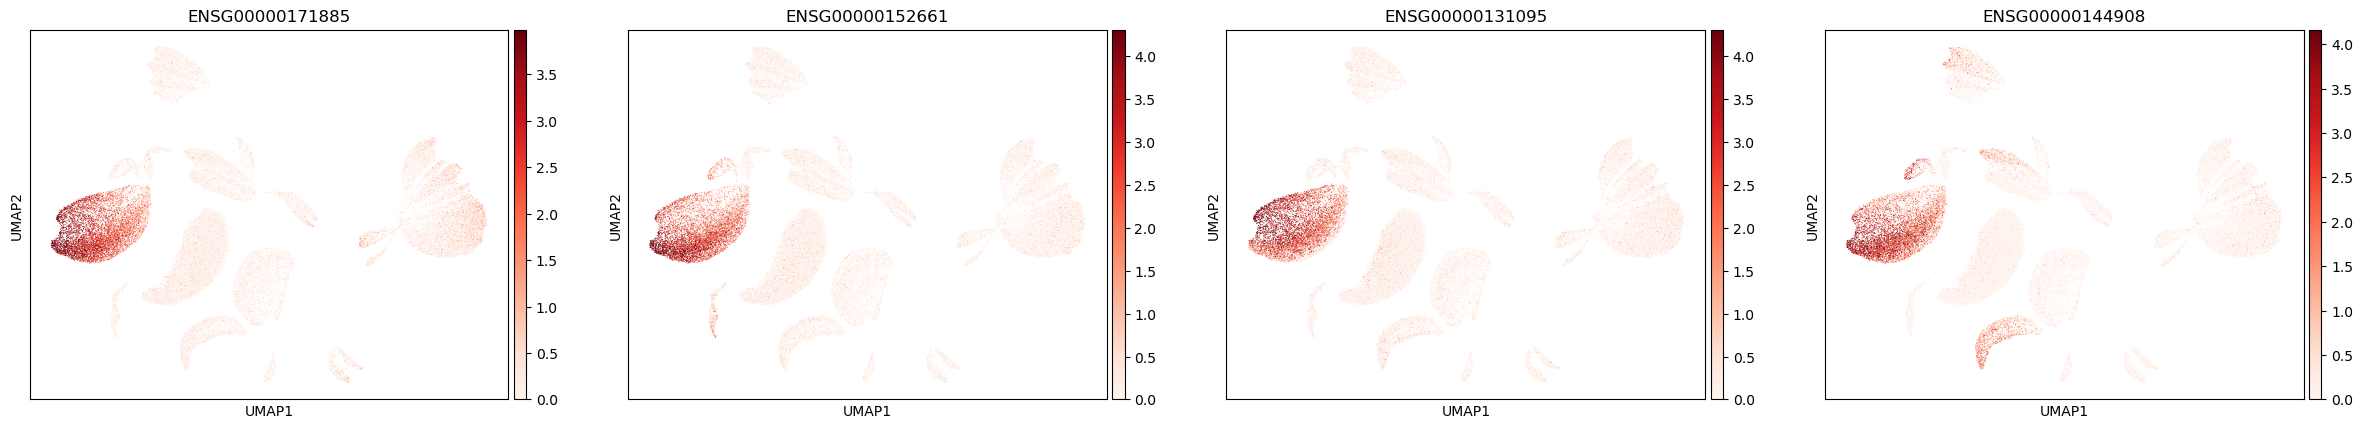





ENDOTHELIAL CELLS:


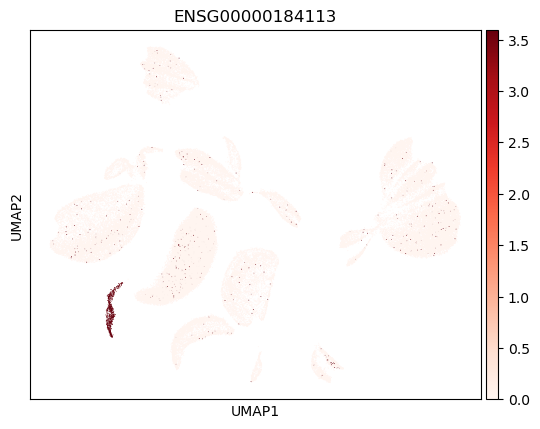





IMMUNE CELLS:


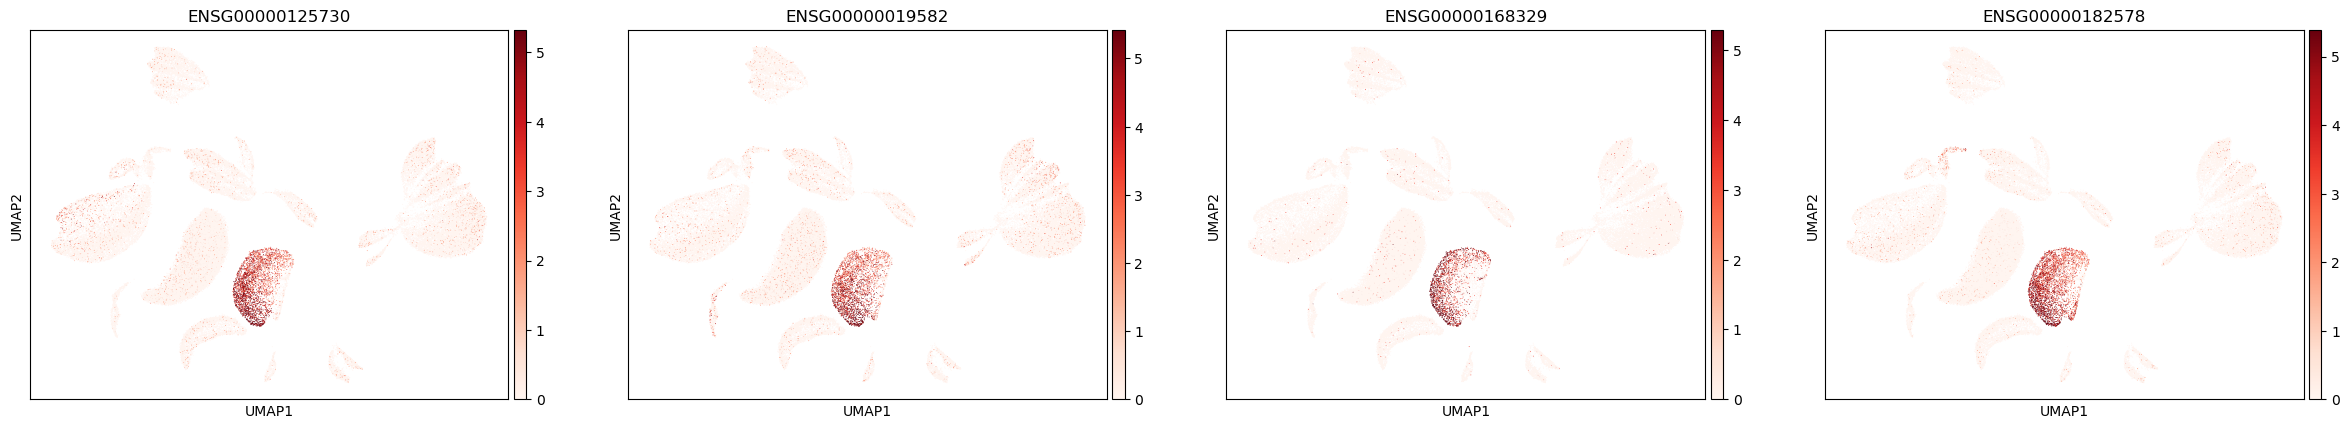





OLIGODENDROCYTES: No marker genes found in data.

OPC:


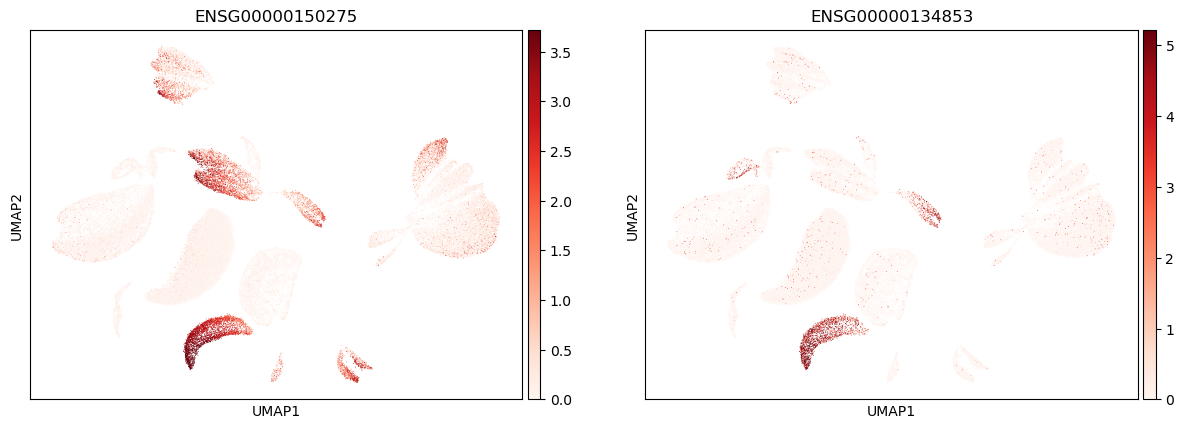





EXCITATORY NEURONS:


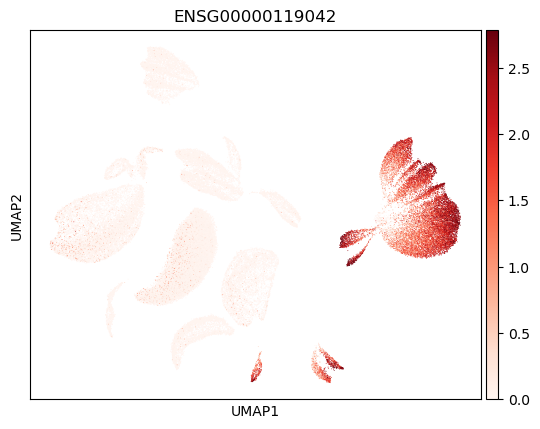





INHIBITORY NEURONS:


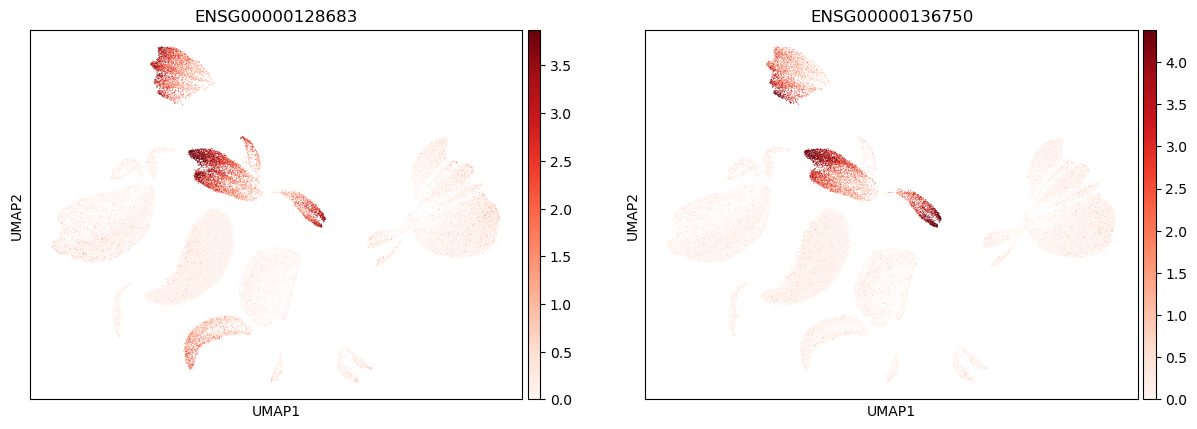





MURAL:


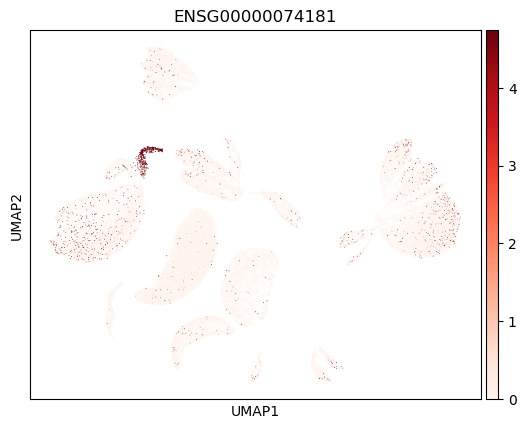

In [ ]:
for ct in cell_types:
    markers = marker_genes_in_data[ct]
    if not markers:  # Skip if the list is empty
        print(f"{ct.upper()}: No marker genes found in data.\n")
        continue
    
    print(f"{ct.upper()}:")  # print cell subtype name
    sc.pl.umap(
        adata_hvg,
        color = markers,
        vmin = 0,
        vmax = "p99",
        sort_order = False,
        cmap = "Reds",
    )
    
    print("\n\n\n")  # print white space for legibility

Dotplot visualization of marker gene expression per cluster:

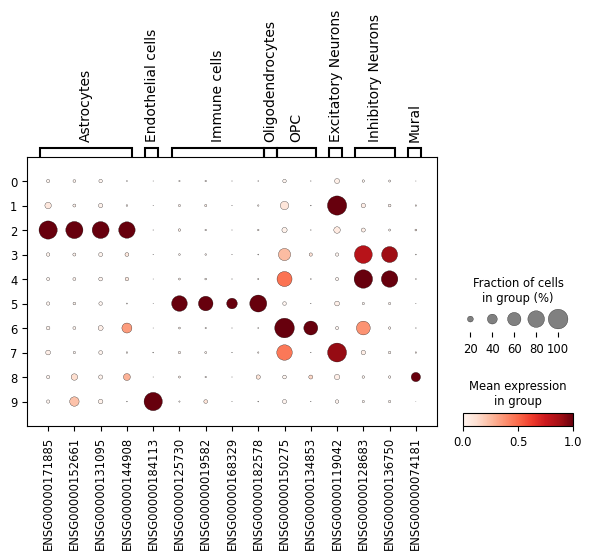

In [ ]:
sc.pl.dotplot(
    adata_hvg,
    groupby = "leiden",
    var_names = marker_genes_in_data,
    standard_scale = "var",  # standard scale: normalize each gene to range from 0 to 1
)

Referring to both representations, we can manually annotate the clusters:

In [ ]:
cl_annotation = {
    "0": "Oligodendrocytes",
    "1": "Excitatory Neurons",
    "2": "Astrocytes", 
    "3": "Inhibitory Neurons",
    "4": "Inhibitory Neurons", 
    "5" : "Immune cells", 
    "6" : "OPC",
    "7" : "Excitatory Neurons",
    "8" : "Mural",
    "9" : "Endothelial cells"
}

To visualize the annotations:

... storing 'manual_celltype_annotation' as categorical


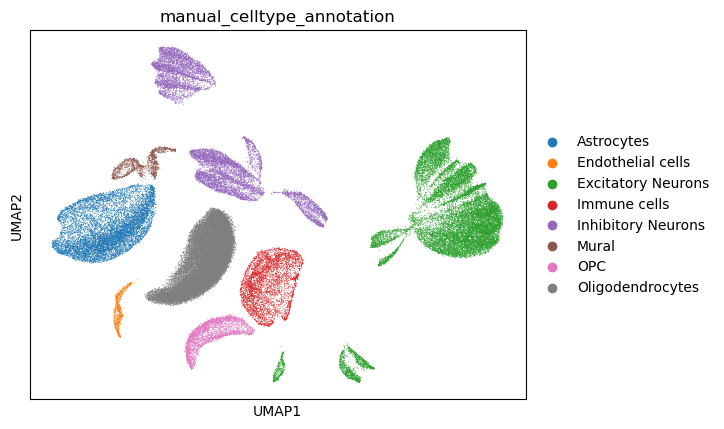

In [ ]:
adata_hvg.obs["manual_celltype_annotation"] = adata_hvg.obs.leiden.map(cl_annotation)

sc.pl.umap(adata_hvg, color = ["manual_celltype_annotation"])

To confirm our annotations, we can find the differentially expressed genes for each cluster as compared to the others. We also want to use this to distinguish clusters 4 and 5.

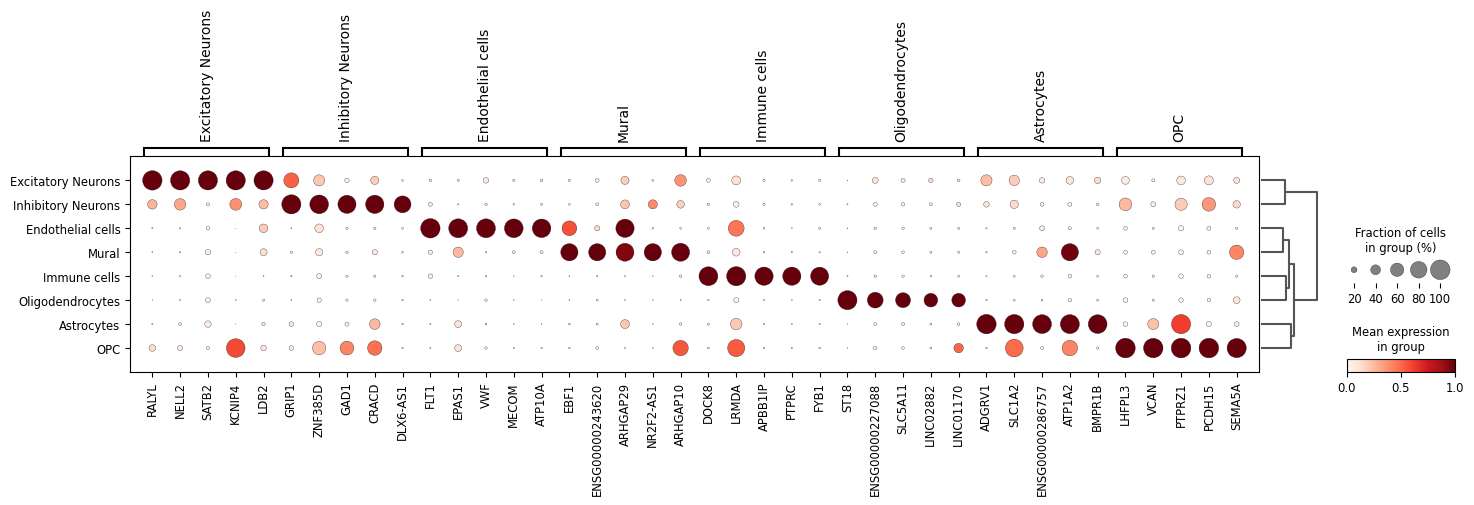

In [ ]:
# Calculating differentially expressed genes for each cluster 
    ## We are using the rank_genes_groups function from scanpy for annotations, but for downstream analyses, we will do pseudo-bulk differential expression to avoid pseudoreplication issues

sc.tl.rank_genes_groups(
    adata_hvg, groupby = "manual_celltype_annotation", method = "wilcoxon", key_added = "dea_leiden", var_names="gene_name"
)

# Visualizing the expression of the 5 top DE genes per cluster (dotplot representation)
sc.pl.rank_genes_groups_dotplot(
    adata_hvg, groupby = "manual_celltype_annotation", standard_scale = "var", n_genes = 5, key = "dea_leiden" , gene_symbols="gene_name"
)

## 8. Differential Gene Expression

### *Pseudobulk*

In [ ]:
x = (adata_raw.obs.groupby([ "disease"], observed=True)["donor_id"].nunique())
print("The number of donor per disease condition :\n",x)
print("\nThe number of cells per disease condition ;")
adata_raw.obs.groupby(["class", "disease"]).size().unstack(fill_value=0)

The number of donor per disease condition :
 disease
dementia || Alzheimer disease    8
dementia || Parkinson disease    3
normal                           6
Name: donor_id, dtype: int64

The number of cells per disease condition ;


disease  dementia || Alzheimer disease  dementia || Parkinson disease  normal
class                                                                        
Astro                             4620                           1128    3487
EN                                7602                            804    9311
Endo                               417                             39     284
IN                                4695                            539    5024
Immune                            2188                            383    1699
Mural                              684                             69     595
OPC                               1256                            323    1506
Oligo                            10242                           4461   15216

pseudo-bulk matrix (=pb) : 

- lines : cell type per donor 
- columns : mean expression levels

each donor is an indepedant observation. We cannot compare each cell one by one because it's statistically false. We do a pseudo-bulk donor x cell type.

Each value corresponds to the mean log-normalized of 1 donor for 1 cell type

In [ ]:
# Creation of dataframe for pseudobulk
df = adata_raw.to_df()  # 
meta = adata_raw.obs[["donor_id", "class", "disease"]]

df["donor_id"] = meta["donor_id"].values
df["class"] = meta["class"].values
df["disease"] = meta["disease"].values

pb = (df.groupby(["class", "donor_id", "disease"]).sum()) # sum of n_counts per class, donor and disease
pb = pb[pb.sum(axis=1) != 0] # deleting empty lines
pb = pb.reset_index()

# check if the dataframe is of correct shape
if pb.shape[0] == len((adata.obs["donor_id"].cat.categories))* len((adata.obs["class"].cat.categories)) and pb.shape[1] == len(adata_raw.var)+3 :
    print("Dataframe IS OK : no donor or gene were deleted")
else : 
    print("WARNING : wrong number of donors")
pb

Dataframe IS OK : no donor or gene were deleted


class    donor_id                        disease  ENSG00000000003  \
0    Astro    Donor_31  dementia || Alzheimer disease             71.0   
1    Astro   Donor_228  dementia || Alzheimer disease             63.0   
2    Astro   Donor_333  dementia || Alzheimer disease            110.0   
3    Astro   Donor_545  dementia || Parkinson disease             19.0   
4    Astro   Donor_609                         normal             60.0   
..     ...         ...                            ...              ...   
131  Oligo  Donor_1001  dementia || Alzheimer disease              5.0   
132  Oligo  Donor_1007  dementia || Alzheimer disease              0.0   
133  Oligo  Donor_1146                         normal             10.0   
134  Oligo  Donor_1278                         normal              8.0   
135  Oligo  Donor_1467  dementia || Parkinson disease              1.0   

     ENSG00000000005  ENSG00000000419  ENSG00000000457  ENSG00000000460  \
0                7.0            242.0            173.0            139.0   
1                1.0            258.0            197.0            123.0   
2               12.0            140.0            102.0            101.0   
3                3.0            154.0            112.0             69.0   
4                6.0            245.0            156.0            106.0   
..               ...              ...              ...              ...   
131              0.0            293.0            204.0            266.0   
132              0.0             15.0             11.0             15.0   
133              0.0            319.0            213.0            165.0   
134              1.0            808.0            516.0            642.0   
135              0.0             55.0             38.0             35.0   

     ENSG00000000938  ENSG00000000971  ...  ENSG00000288600  ENSG00000288602  \
0                1.0              4.0  ...              0.0             98.0   
1                2.0              1.0  ...              1.0            119.0   
2                1.0              5.0  ...              0.0             69.0   
3                1.0              1.0  ...              0.0             91.0   
4                2.0              8.0  ...              0.0            121.0   
..               ...              ...  ...              ...              ...   
131              6.0             18.0  ...              0.0            164.0   
132              0.0              1.0  ...              0.0              4.0   
133              4.0              7.0  ...              0.0             85.0   
134              5.0             30.0  ...              2.0            270.0   
135              0.0              1.0  ...              0.0             25.0   

     ENSG00000288605  ENSG00000288606  ENSG00000288611  ENSG00000288612  \
0               37.0              6.0              0.0             21.0   
1               25.0             10.0              1.0             30.0   
2               13.0              7.0              1.0             18.0   
3               21.0              7.0              1.0             19.0   
4               13.0             12.0              1.0             27.0   
..               ...              ...              ...              ...   
131              3.0             50.0              1.0             38.0   
132              0.0              4.0              0.0              3.0   
133              3.0             31.0              0.0             29.0   
134              0.0             74.0              2.0             69.0   
135              1.0              5.0              0.0              5.0   

     ENSG00000288622  ENSG00000288637  ENSG00000288642  ENSG00000288643  
0                4.0              3.0             15.0             13.0  
1                3.0              5.0             10.0             17.0  
2                1.0              3.0             39.0             16.0  
3                2.0              6.0             13.0   

In [ ]:
# saving the pseudobulk matrix into csv
pb.to_csv("pseudobulk_matrix.csv", index = False)

### *Differential analysis is done in R*

example of a DE result

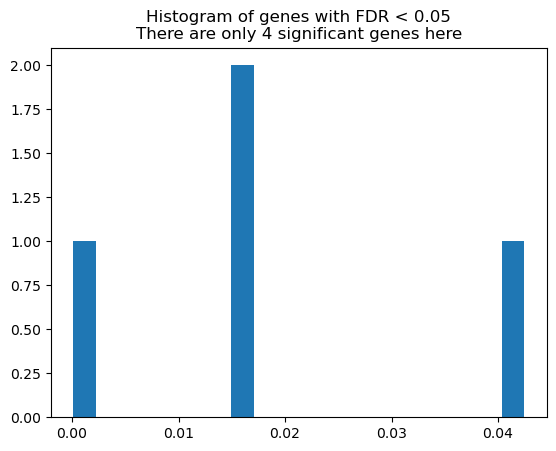

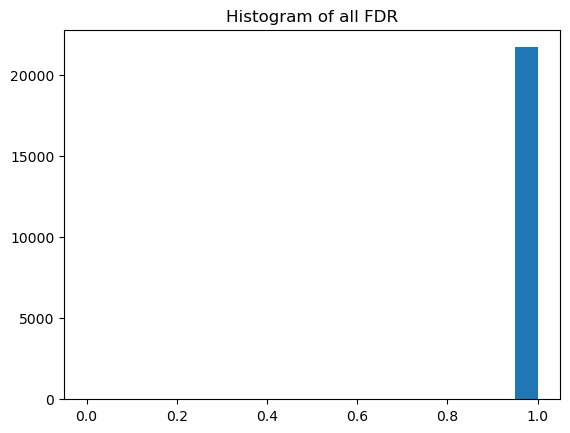

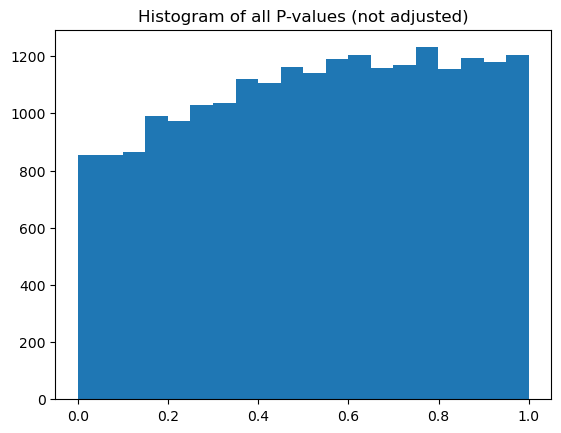

logFC    logCPM          F        PValue       FDR
ENSG00000026508 -2.192966  1.817744  75.958392  5.298840e-09  0.000116
ENSG00000259520 -2.348001  2.874461  41.200614  1.394094e-06  0.015099
ENSG00000188393  4.813545  0.349007  33.295073  2.076138e-06  0.015099
ENSG00000225231  4.497031  1.948137  32.146706  7.784117e-06  0.042458

In [ ]:
x = pd.read_csv("edgeR_results/edgeR_IN_AD_vs_CTRL.csv",index_col=0)
plt.hist(x[x["FDR"]< 0.05]["FDR"],bins=20) 
plt.title("Histogram of genes with FDR < 0.05\nThere are only 4 significant genes here")
plt.show()

plt.hist(x["FDR"],bins=20) 
plt.title("Histogram of all FDR")
plt.show()

plt.hist(x["PValue"],bins=20) 
plt.title("Histogram of all P-values (not adjusted)")
plt.show()

x[x["FDR"]<0.05] # every gene where padj < 0.05


# **GSEA**

Loading the DE results:

fonction pour ajouter la colonne de gène et l'ajouter à un fichier qui vient d'être load + rank les gènes avec un -logFC jsp quoi. un ranked signed

In [10]:
files = glob.glob("edgeR_results/*.csv")
files

['edgeR_results\\edgeR_Astro_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Astro_AD_vs_PD.csv',
 'edgeR_results\\edgeR_Astro_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Endo_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Endo_AD_vs_PD.csv',
 'edgeR_results\\edgeR_Endo_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_EN_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_EN_AD_vs_PD.csv',
 'edgeR_results\\edgeR_EN_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Immune_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Immune_AD_vs_PD.csv',
 'edgeR_results\\edgeR_Immune_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_IN_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_IN_AD_vs_PD.csv',
 'edgeR_results\\edgeR_IN_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Mural_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Mural_AD_vs_PD.csv',
 'edgeR_results\\edgeR_Mural_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Oligo_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Oligo_AD_vs_PD.csv',
 'edgeR_results\\edgeR_Oligo_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_OPC_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR

In [ ]:
# Compter cellules par (donor, disease, class)
df = (
    adata.obs
    .groupby(["donor_id", "disease", "class"])
    .size()
    .reset_index(name="n_cells")
)

df = df[df["n_cells"]!=0]

df["disease"] = df["disease"].replace({
    "dementia || Alzheimer disease": "Alzheimer disease",
    "dementia || Parkinson disease": "Parkinson disease",
    "normal": "Control"
})

df

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_36758/957203659.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["donor_id", "disease", "class"])
/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_36758/957203659.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["disease"] = df["disease"].replace({


donor_id            disease   class  n_cells
0      Donor_31  Alzheimer disease   Astro      430
1      Donor_31  Alzheimer disease      EN      832
2      Donor_31  Alzheimer disease    Endo        1
3      Donor_31  Alzheimer disease      IN      326
4      Donor_31  Alzheimer disease  Immune      345
..          ...                ...     ...      ...
395  Donor_1467  Parkinson disease      IN       49
396  Donor_1467  Parkinson disease  Immune       53
397  Donor_1467  Parkinson disease   Mural       16
398  Donor_1467  Parkinson disease     OPC       97
399  Donor_1467  Parkinson disease   Oligo      120

[136 rows x 4 columns]

In [ ]:
tot = adata.obs.groupby(["donor_id"]).size().reset_index(name="total")

# Merge
df = df.merge(tot, on="donor_id")
df["prop"] = df["n_cells"] / df["total"]

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_36758/1783639050.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tot = adata.obs.groupby(["donor_id"]).size().reset_index(name="total")


In [169]:
list(df["class"].unique())

['Astro', 'EN', 'Endo', 'IN', 'Immune', 'Mural', 'OPC', 'Oligo']

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_36758/3369405633.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_36758/3369405633.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_36758/3369405633.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_36758/3369405633.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

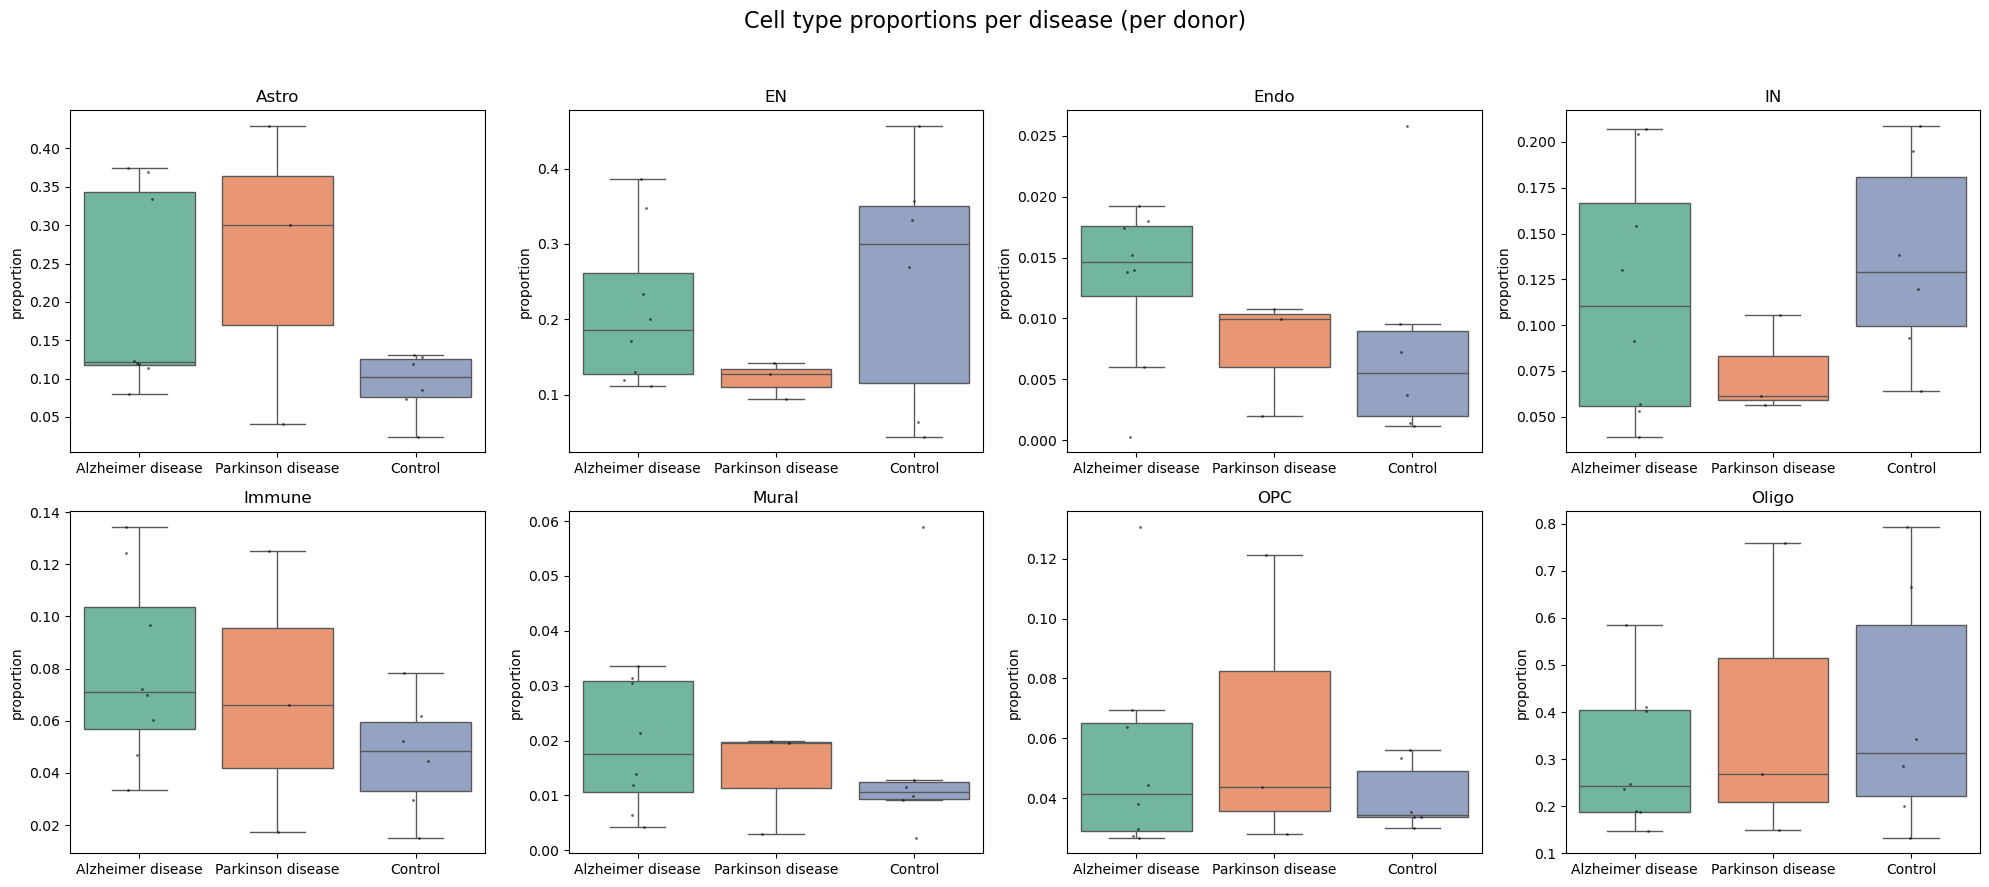

In [ ]:
classes = df["class"].unique()
n = len(classes)

# nombre de lignes et colonnes dans la grille des panels
ncols = 4
nrows = int(np.ceil(n / ncols))

plt.figure(figsize = (20, 9))

for i, celltype in enumerate(classes, 1):
    sub = df[df["class"] == celltype]

    ax = plt.subplot(nrows, ncols, i)

    sns.boxplot(
        data = sub,
        x = "disease",
        y = "prop",
        palette = "Set2",
        showfliers = False,
        ax = ax
    )

    sns.stripplot(
        data = sub,
        x = "disease",
        y = "prop",
        color = "black",
        size = 2,
        jitter = True,
        alpha = 0.6,
        ax = ax
    )

    ax.set_title(celltype)
    ax.set_xlabel("")
    ax.set_ylabel("proportion")

plt.suptitle("Cell type proportions per disease (per donor)", fontsize = 16)
plt.tight_layout(rect = [0, 0, 1, 0.95])
plt.show()

pvalues non significatives (je les ai calculées). Apparemment c'est normal et on fait jamais de tests stats sur des proportions, c'est vu qu'on a peu de donneur par condition, on voit pas grand chose. 

fin elodie

We first need to match the gene IDs in our list to those in the gene set libraries that will be used later. No need to rerun the mygene conversions unless there's any changes in the previous steps as it is time-consuming. It's already been done and saved in the repo!

In [ ]:
# This takes super long- don't run it again if you don't need to, I already saved the files and they're in the repo!

# mg = mygene.MyGeneInfo()

# for file in files:
#     print("Reading:", file)
#     df = pd.read_csv(file)

#     # Detect the column with the gene Ensembl IDs
#     ens_col = None
#     for col in df.columns:
#         # Check if the first non-null value looks like an Ensembl ID
#         val = str(df[col].dropna().iloc[0])
#         if val.startswith("ENSG"):
#             ens_col = col
#             break

#     # Rename column to gene_ensembl
#     df.rename(columns = {ens_col: "gene_ensembl"}, inplace = True)

#     # Remove version numbers if present
#     df["gene_ensembl"] = df["gene_ensembl"].astype(str).str.split(".").str[0]

#     # 3. Convert Ensembl IDs to gene symbols
#     print("   Querying MyGene.info …")

#     results = mg.querymany(
#         df["gene_ensembl"].tolist(),
#         scopes = "ensembl.gene",
#         fields = "symbol",
#         species = "human",
#         as_dataframe = False
#     )

#     # Build mapping dictionary
#     mapping = {item["query"]: item.get("symbol", None) for item in results}

#     # Map into DF
#     df["gene_symbol"] = df["gene_ensembl"].map(mapping)

#     # Uppercase symbols
#     df["gene_symbol"] = df["gene_symbol"].astype(str).str.upper()

#     # Save back into the same file
#     df.to_csv(file, index=False)
#     print(f"Updated file saved: {file}\n")

Reading: edgeR_results\edgeR_Astro_AD_vs_CTRL.csv
✔ Detected Ensembl column: Unnamed: 0


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


   Querying MyGene.info …


13 input query terms found dup hits:	[('ENSG00000287326', 2), ('ENSG00000250406', 2), ('ENSG00000234162', 2), ('ENSG00000257545', 2), ('E
5 input query terms found no hit:	['ENSG00000280987', 'ENSG00000266957', 'ENSG00000267058', 'ENSG00000189144', 'ENSG00000250410']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_Astro_AD_vs_CTRL.csv

Reading: edgeR_results\edgeR_Astro_AD_vs_PD.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


13 input query terms found dup hits:	[('ENSG00000276241', 4), ('ENSG00000243620', 2), ('ENSG00000257545', 2), ('ENSG00000287326', 2), ('E
5 input query terms found no hit:	['ENSG00000267058', 'ENSG00000250410', 'ENSG00000266957', 'ENSG00000189144', 'ENSG00000280987']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_Astro_AD_vs_PD.csv

Reading: edgeR_results\edgeR_Astro_PD_vs_CTRL.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


13 input query terms found dup hits:	[('ENSG00000287326', 2), ('ENSG00000257545', 2), ('ENSG00000276241', 4), ('ENSG00000234162', 2), ('E
5 input query terms found no hit:	['ENSG00000267058', 'ENSG00000280987', 'ENSG00000266957', 'ENSG00000250410', 'ENSG00000189144']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_Astro_PD_vs_CTRL.csv

Reading: edgeR_results\edgeR_Endo_AD_vs_CTRL.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


2 input query terms found dup hits:	[('ENSG00000243620', 2), ('ENSG00000227110', 2)]
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_Endo_AD_vs_CTRL.csv

Reading: edgeR_results\edgeR_Endo_AD_vs_PD.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


2 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000243620', 2)]
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_Endo_AD_vs_PD.csv

Reading: edgeR_results\edgeR_Endo_PD_vs_CTRL.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


2 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000243620', 2)]


✔ Updated file saved: edgeR_results\edgeR_Endo_PD_vs_CTRL.csv

Reading: edgeR_results\edgeR_EN_AD_vs_CTRL.csv
✔ Detected Ensembl column: Unnamed: 0


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


   Querying MyGene.info …


19 input query terms found dup hits:	[('ENSG00000215156', 2), ('ENSG00000287478', 2), ('ENSG00000285761', 3), ('ENSG00000226506', 2), ('E
5 input query terms found no hit:	['ENSG00000189144', 'ENSG00000267058', 'ENSG00000280987', 'ENSG00000250410', 'ENSG00000266957']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_EN_AD_vs_CTRL.csv

Reading: edgeR_results\edgeR_EN_AD_vs_PD.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


19 input query terms found dup hits:	[('ENSG00000215156', 2), ('ENSG00000287478', 2), ('ENSG00000234162', 2), ('ENSG00000261600', 2), ('E
5 input query terms found no hit:	['ENSG00000266957', 'ENSG00000250410', 'ENSG00000189144', 'ENSG00000267058', 'ENSG00000280987']


✔ Updated file saved: edgeR_results\edgeR_EN_AD_vs_PD.csv

Reading: edgeR_results\edgeR_EN_PD_vs_CTRL.csv
✔ Detected Ensembl column: Unnamed: 0


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


   Querying MyGene.info …


19 input query terms found dup hits:	[('ENSG00000234162', 2), ('ENSG00000261600', 2), ('ENSG00000250406', 2), ('ENSG00000243620', 2), ('E
5 input query terms found no hit:	['ENSG00000266957', 'ENSG00000267058', 'ENSG00000189144', 'ENSG00000250410', 'ENSG00000280987']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_EN_PD_vs_CTRL.csv

Reading: edgeR_results\edgeR_Immune_AD_vs_CTRL.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


8 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000175711', 2), ('ENSG00000276241', 4), ('ENSG00000234352', 2), ('E
2 input query terms found no hit:	['ENSG00000266957', 'ENSG00000189144']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_Immune_AD_vs_CTRL.csv

Reading: edgeR_results\edgeR_Immune_AD_vs_PD.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


8 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000257545', 2), ('ENSG00000276241', 4), ('ENSG00000234162', 2), ('E
2 input query terms found no hit:	['ENSG00000189144', 'ENSG00000266957']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_Immune_AD_vs_PD.csv

Reading: edgeR_results\edgeR_Immune_PD_vs_CTRL.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


8 input query terms found dup hits:	[('ENSG00000234162', 2), ('ENSG00000257545', 2), ('ENSG00000276241', 4), ('ENSG00000278932', 3), ('E
2 input query terms found no hit:	['ENSG00000189144', 'ENSG00000266957']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_Immune_PD_vs_CTRL.csv

Reading: edgeR_results\edgeR_IN_AD_vs_CTRL.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


18 input query terms found dup hits:	[('ENSG00000228566', 2), ('ENSG00000261600', 2), ('ENSG00000215156', 2), ('ENSG00000287326', 2), ('E
5 input query terms found no hit:	['ENSG00000250410', 'ENSG00000266957', 'ENSG00000267058', 'ENSG00000280987', 'ENSG00000189144']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_IN_AD_vs_CTRL.csv

Reading: edgeR_results\edgeR_IN_AD_vs_PD.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


18 input query terms found dup hits:	[('ENSG00000227110', 2), ('ENSG00000261600', 2), ('ENSG00000215156', 2), ('ENSG00000175711', 2), ('E
5 input query terms found no hit:	['ENSG00000189144', 'ENSG00000266957', 'ENSG00000280987', 'ENSG00000267058', 'ENSG00000250410']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_IN_AD_vs_PD.csv

Reading: edgeR_results\edgeR_IN_PD_vs_CTRL.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


18 input query terms found dup hits:	[('ENSG00000261600', 2), ('ENSG00000227110', 2), ('ENSG00000250406', 2), ('ENSG00000243620', 2), ('E
5 input query terms found no hit:	['ENSG00000266957', 'ENSG00000189144', 'ENSG00000267058', 'ENSG00000280987', 'ENSG00000250410']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_IN_PD_vs_CTRL.csv

Reading: edgeR_results\edgeR_Mural_AD_vs_CTRL.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


5 input query terms found dup hits:	[('ENSG00000234162', 2), ('ENSG00000278932', 3), ('ENSG00000243620', 2), ('ENSG00000227110', 2), ('E
1 input query terms found no hit:	['ENSG00000250410']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_Mural_AD_vs_CTRL.csv

Reading: edgeR_results\edgeR_Mural_AD_vs_PD.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


5 input query terms found dup hits:	[('ENSG00000234162', 2), ('ENSG00000228566', 2), ('ENSG00000278932', 3), ('ENSG00000243620', 2), ('E
1 input query terms found no hit:	['ENSG00000250410']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_Mural_AD_vs_PD.csv

Reading: edgeR_results\edgeR_Mural_PD_vs_CTRL.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


5 input query terms found dup hits:	[('ENSG00000228566', 2), ('ENSG00000234162', 2), ('ENSG00000243620', 2), ('ENSG00000278932', 3), ('E
1 input query terms found no hit:	['ENSG00000250410']


✔ Updated file saved: edgeR_results\edgeR_Mural_PD_vs_CTRL.csv

Reading: edgeR_results\edgeR_Oligo_AD_vs_CTRL.csv
✔ Detected Ensembl column: Unnamed: 0


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


   Querying MyGene.info …


14 input query terms found dup hits:	[('ENSG00000215156', 2), ('ENSG00000287326', 2), ('ENSG00000257545', 2), ('ENSG00000243620', 2), ('E
5 input query terms found no hit:	['ENSG00000280987', 'ENSG00000267058', 'ENSG00000266957', 'ENSG00000250410', 'ENSG00000189144']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_Oligo_AD_vs_CTRL.csv

Reading: edgeR_results\edgeR_Oligo_AD_vs_PD.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


14 input query terms found dup hits:	[('ENSG00000215156', 2), ('ENSG00000175711', 2), ('ENSG00000226519', 2), ('ENSG00000228044', 2), ('E
5 input query terms found no hit:	['ENSG00000267058', 'ENSG00000250410', 'ENSG00000280987', 'ENSG00000189144', 'ENSG00000266957']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_Oligo_AD_vs_PD.csv

Reading: edgeR_results\edgeR_Oligo_PD_vs_CTRL.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


14 input query terms found dup hits:	[('ENSG00000287326', 2), ('ENSG00000175711', 2), ('ENSG00000228044', 2), ('ENSG00000250406', 2), ('E
5 input query terms found no hit:	['ENSG00000280987', 'ENSG00000189144', 'ENSG00000267058', 'ENSG00000250410', 'ENSG00000266957']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_Oligo_PD_vs_CTRL.csv

Reading: edgeR_results\edgeR_OPC_AD_vs_CTRL.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


10 input query terms found dup hits:	[('ENSG00000287326', 2), ('ENSG00000257545', 2), ('ENSG00000234162', 2), ('ENSG00000250406', 2), ('E
4 input query terms found no hit:	['ENSG00000266957', 'ENSG00000280987', 'ENSG00000189144', 'ENSG00000250410']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_OPC_AD_vs_CTRL.csv

Reading: edgeR_results\edgeR_OPC_AD_vs_PD.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


10 input query terms found dup hits:	[('ENSG00000287326', 2), ('ENSG00000257545', 2), ('ENSG00000227110', 2), ('ENSG00000250406', 2), ('E
4 input query terms found no hit:	['ENSG00000250410', 'ENSG00000266957', 'ENSG00000189144', 'ENSG00000280987']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


✔ Updated file saved: edgeR_results\edgeR_OPC_AD_vs_PD.csv

Reading: edgeR_results\edgeR_OPC_PD_vs_CTRL.csv
✔ Detected Ensembl column: Unnamed: 0
   Querying MyGene.info …


10 input query terms found dup hits:	[('ENSG00000287326', 2), ('ENSG00000257545', 2), ('ENSG00000250406', 2), ('ENSG00000243620', 2), ('E
4 input query terms found no hit:	['ENSG00000266957', 'ENSG00000280987', 'ENSG00000250410', 'ENSG00000189144']


✔ Updated file saved: edgeR_results\edgeR_OPC_PD_vs_CTRL.csv



In [ ]:
# Check that the "gene_symbol" column now contains gene symbols
for file in files:
    df = pd.read_csv(file)
    print(df["gene_symbol"].head())

0    LOC105375775
1           VEGFD
2      CYP1B1-AS1
3            APIP
4            GBP2
Name: gene_symbol, dtype: object
0       LINC01234
1            NONE
2    LOC105375344
3          APOLD1
4       LINC02425
Name: gene_symbol, dtype: object
0         NONE
1         NONE
2     C1ORF162
3    LINC02425
4     RPL7AP74
Name: gene_symbol, dtype: object
0      NONE
1    IFI44L
2      TBX3
3    EPSTI1
4      NONE
Name: gene_symbol, dtype: object
0     RSAD2
1    SAMD9L
2    PIK3R3
3    IFI44L
4       PKM
Name: gene_symbol, dtype: object
0    PIK3R3
1     CEP57
2      TBX3
3      MAP2
4     CREB5
Name: gene_symbol, dtype: object
0          CD44
1          NONE
2    CFAP61-AS1
3        PTCSC2
4     LINC01945
Name: gene_symbol, dtype: object
0    LOC100507053
1          POTEKP
2       LINC00880
3            NONE
4          CYP1A2
Name: gene_symbol, dtype: object
0          POTEKP
1            CD44
2       LINC02425
3    LOC100507053
4            NONE
Name: gene_symbol, dtype: object
0    LIN

GSEA requires a ranked list of genes. To rank our genes for each file, we can create a function:

In [13]:
# Creating the "prepare_ranking" function
def prepare_ranking(df):
    df = pd.read_csv(df)
    df = df.dropna(subset = ["gene_symbol", "logFC", "PValue"])
    df["ranking"] = df["logFC"] * -np.log10(df["PValue"])
    df = df[["gene_symbol", "ranking"]].sort_values("ranking", ascending = False)
    return df

In [ ]:
# Checking that the function works with an example
print(files[0])
prepare_ranking(files[0])

edgeR_results\edgeR_Astro_AD_vs_CTRL.csv


gene_symbol    ranking
813           CPA1  13.590967
2101          NONE   6.476106
160          GSTT2   4.895563
450           NONE   4.733958
79         PRODHLP   4.645555
...            ...        ...
32          IFI44L  -8.290254
8     LOC105377411  -9.792809
17       LINC01708 -11.185308
31            NONE -11.227080
0     LOC105375775 -17.306611

[19761 rows x 2 columns]

Loading the needed gene set libraries:

In [ ]:
#Initially tried with the following list of libraries, but took too long to run, so we reduced the list:

# libs = [
#    "PanglaoDB_Augmented_2021",
#    "CellMarker_Augmented_2021",
#    "GO_Biological_Process_2021",
#    "Reactome_2022",
#    "KEGG_2021_Human"]

# Reduced list of GS libraries
libs = ["PanglaoDB_Augmented_2021", 
        "MSigDB_Hallmark_2020", 
        "GO_Biological_Process_2021"]

for lib in libs:
    try:
        gp.get_library(name = lib, organism = "Human")
        print(f"Loaded: {lib}")
    except Exception as e:
        print(f"FAILED: {lib} → {e}")

Loaded: PanglaoDB_Augmented_2021
Loaded: MSigDB_Hallmark_2020
Loaded: GO_Biological_Process_2021


Running preranked GSEA:

In [ ]:
# Don't run this again if there are no changes in the pipeline/previous results - I've already run it once and have the results saved

# outdir = "GSEA_results"
# os.makedirs(outdir, exist_ok = True)

# for file in files:
#    print("Starting:", file)

#    try:
#        df = pd.read_csv(file)
#        ranking = prepare_ranking(df)
#        name = os.path.splitext(os.path.basename(file))[0]

#         # Create both output folders
#        result_dir = os.path.join(outdir, name)
#        prerank_dir = os.path.join(result_dir, "prerank")

#         os.makedirs(prerank_dir, exist_ok = True)

#         pre_res = gp.prerank(
#            rnk = ranking,
#            gene_sets = libs,
#            outdir = f"{outdir}/{name}",
#            permutation_num = 100,
#            min_size = 5,
#            max_size = 5000,
#            no_plot = True,
#            format = "png",
#            sanitize = True
#            )
        
#         print(f"Finished: {name}")

#    except Exception as e:
#        print(f"Error processing {file}:\n{e}")

Starting: edgeR_results\edgeR_Astro_AD_vs_CTRL_GENESYMBOL.csv
Finished: edgeR_Astro_AD_vs_CTRL_GENESYMBOL
Starting: edgeR_results\edgeR_Astro_AD_vs_PD_GENESYMBOL.csv
Finished: edgeR_Astro_AD_vs_PD_GENESYMBOL
Starting: edgeR_results\edgeR_Astro_PD_vs_CTRL_GENESYMBOL.csv
Finished: edgeR_Astro_PD_vs_CTRL_GENESYMBOL
Starting: edgeR_results\edgeR_Endo_AD_vs_CTRL_GENESYMBOL.csv
Finished: edgeR_Endo_AD_vs_CTRL_GENESYMBOL
Starting: edgeR_results\edgeR_Endo_AD_vs_PD_GENESYMBOL.csv
Finished: edgeR_Endo_AD_vs_PD_GENESYMBOL
Starting: edgeR_results\edgeR_Endo_PD_vs_CTRL_GENESYMBOL.csv
Finished: edgeR_Endo_PD_vs_CTRL_GENESYMBOL
Starting: edgeR_results\edgeR_EN_AD_vs_CTRL_GENESYMBOL.csv
Finished: edgeR_EN_AD_vs_CTRL_GENESYMBOL
Starting: edgeR_results\edgeR_EN_AD_vs_PD_GENESYMBOL.csv
Finished: edgeR_EN_AD_vs_PD_GENESYMBOL
Starting: edgeR_results\edgeR_EN_PD_vs_CTRL_GENESYMBOL.csv
Finished: edgeR_EN_PD_vs_CTRL_GENESYMBOL
Starting: edgeR_results\edgeR_Immune_AD_vs_CTRL_GENESYMBOL.csv
Finished: edgeR_Imm

**GSEA Results: Ridge plot representation for MSigDB terms per cell type**

First, we need to save the GSEA results for MSigDB terms in a separate csv:

In [ ]:
GSEA_ROOT = "GSEA_results"

report_files = glob.glob(
    os.path.join(GSEA_ROOT, "*", "gseapy.gene_set.prerank.report.csv"), recursive = True)

In [ ]:
records = []

for rpt in report_files:
    comp_raw = os.path.normpath(rpt).split(os.sep)[-2]

    # Clean comparison name
    comp = (
        comp_raw.replace("edgeR_", "")
        .replace("_GENESYMBOL", "")
        .replace("_", " ")
        .strip()
    )

    df = pd.read_csv(rpt)

    # Keep MSigDB Hallmark only
    if "Term" not in df.columns:
        continue

    msig = df[df["Term"].str.contains("HALLMARK", case = False, na = False)].copy()
    if msig.empty:
        continue

    # Clean pathway name: remove dataset prefix + underscores
    msig["pathway"] = (
        msig["Term"]
        .str.replace("MSigDB Hallmark 2020 ", "", regex = False)
        .str.replace("HALLMARK_", "", regex = False)
        .str.replace("_", " ", regex = False)
        .str.strip()
    )

    # Force numeric conversion
    msig["NES"] = pd.to_numeric(msig["NES"], errors = "coerce")

    if "FDR" in msig.columns:
        msig["FDR"] = msig["FDR"]
    elif "FDR q-val" in msig.columns:
        msig["FDR"] = msig["FDR q-val"]

    msig["comparison"] = comp

    records.append(msig[["comparison", "pathway", "NES", "FDR"]])

# Build dataframe
msigdb_df = pd.concat(records, ignore_index = True)
msigdb_df = msigdb_df.dropna(subset = ["NES"])
print("Loaded MSigDB Hallmark results:", msigdb_df.shape)

# Save the dataframe - optional: to avoid rerunning this cell each time you run the pipeline
#msigdb_df.to_csv("MSigDB_Hallmark_only_results.csv", index = False)
#print("Saved → MSigDB_Hallmark_only_results.csv")

Loaded MSigDB Hallmark results: (1200, 4)
Saved → MSigDB_Hallmark_only_results.csv


Then, we can plot the results:
- For each condition, per cell type:

In [ ]:
os.makedirs("MSigDB_ridgeplots_per_cond", exist_ok = True)

# Clean pathway names
msigdb_df["pathway"] = (
    msigdb_df["pathway"]
    .str.replace("MSigDB Hallmark 2020", "", regex = False)
    .str.replace("_", " ", regex = False)
    .str.strip()
)

# Detect cell types
def extract_celltype(comp):
    """Extracts the first word before the space as the cell type."""
    return comp.split()[0]   # Astro, Endo, EN, Immune, IN, Mural, Oligo, OPC

msigdb_df["celltype"] = msigdb_df["comparison"].apply(extract_celltype)

print("Detected cell types:", msigdb_df["celltype"].unique())

# Ridge plots per condition per cell type
celltypes = msigdb_df["celltype"].unique()

for ct in celltypes:

    df_ct = msigdb_df[msigdb_df["celltype"] == ct].copy()
    if df_ct.empty:
        print(f"No MSigDB pathways found for {ct}")
        continue

    # List of conditions (AD_vs_CTRL, AD_vs_PD, PD_vs_CTRL)
    conditions = sorted(df_ct["comparison"].unique())

    # Create ridge plot for EACH CONDITION
    for cond in conditions:

        df_cond = df_ct[df_ct["comparison"] == cond].copy()
        if df_cond.empty:
            print(f"No MSigDB pathways for {ct} under {cond}")
            continue

        # Select top 20 pathways within this celltype + condition only
        df_cond_sorted = df_cond.sort_values("NES", ascending = False)
        top_paths = df_cond_sorted["pathway"].unique()[:20]

        df_plot = df_cond[df_cond["pathway"].isin(top_paths)].copy()

        # Assign Y positions
        df_plot["path_id"] = df_plot["pathway"].astype("category").cat.codes
        df_plot["ypos"] = df_plot["path_id"] * 1.2

        # Plot
        plt.figure(figsize = (10, 12))
        color = cm.get_cmap("viridis")(0.6) # color palette defined

        for _, row in df_plot.iterrows():
            y = row["ypos"]
            x = np.linspace(-5, 5, 400)
            curve = np.exp(-(x - row["NES"])**2 / (2 * 0.4**2))

            plt.plot(x, curve + y, color = color, lw = 2)
            plt.fill_between(x, y, curve + y, alpha = 0.25, color = color)

        # Y-axis labels
        y_labels = (
            df_plot[["pathway", "ypos"]]
            .drop_duplicates()
            .sort_values("ypos")
        )
        plt.yticks(y_labels["ypos"], y_labels["pathway"], fontsize = 10)

        plt.xlabel("NES")
        plt.title(f"{ct} — {cond}\nTop 20 MSigDB Hallmark Pathways", fontsize = 16)

        plt.tight_layout()

        # Save the figure
        outpath = f"MSigDB_ridgeplots_per_cond/{ct}_{cond}_MSigDB_ridgeplot_top20.png"
        plt.savefig(outpath, dpi=300, bbox_inches="tight")
        plt.close()

        print(f"Saved: {outpath}")

Detected cell types: ['Astro' 'Endo' 'EN' 'Immune' 'IN' 'Mural' 'Oligo' 'OPC']


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/Astro_Astro AD vs CTRL_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/Astro_Astro AD vs PD_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/Astro_Astro PD vs CTRL_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/Endo_Endo AD vs CTRL_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/Endo_Endo AD vs PD_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/Endo_Endo PD vs CTRL_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/EN_EN AD vs CTRL_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/EN_EN AD vs PD_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/EN_EN PD vs CTRL_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/Immune_Immune AD vs CTRL_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/Immune_Immune AD vs PD_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/Immune_Immune PD vs CTRL_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/IN_IN AD vs CTRL_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/IN_IN AD vs PD_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/IN_IN PD vs CTRL_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/Mural_Mural AD vs CTRL_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/Mural_Mural AD vs PD_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/Mural_Mural PD vs CTRL_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/Oligo_Oligo AD vs CTRL_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/Oligo_Oligo AD vs PD_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/Oligo_Oligo PD vs CTRL_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/OPC_OPC AD vs CTRL_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/OPC_OPC AD vs PD_MSigDB_ridgeplot_top20.png


C:\Users\yarad\AppData\Local\Temp\ipykernel_1652\947117827.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = cm.get_cmap("viridis")(0.6)


Saved: ridgeplots_per_cond_MSigDB/OPC_OPC PD vs CTRL_MSigDB_ridgeplot_top20.png


- For all three conditions, per cell type:

In [49]:
sns.set_theme(style = "whitegrid")
os.makedirs("MSigDB_ridgeplots", exist_ok = True)

def plot_cell_type_ridge(cell, df, top_n = 20, sigma = 0.2):
    df_ct = df[df["celltype"] == cell].copy()
    if df_ct.empty:
        print(f"No rows for cell type {cell}")
        return

    # Top pathways for this cell type
    top_paths = (
        df_ct.groupby("pathway")["FDR"] # Best FDR across conditions
             .min()
             .sort_values()
             .head(top_n) 
             .index
    )
    df_top = df_ct[df_ct["pathway"].isin(top_paths)].copy()

    # Order pathways by mean NES
    path_order = (
        df_top.groupby("pathway")["NES"]
              .mean()
              .sort_values()
              .index
    )

    comps = sorted(df_top["comparison"].unique())
    colors = dict(zip(comps, sns.color_palette("Set2", len(comps))))

    # Common x‑range for all ridges
    nes_min = df_top["NES"].min() - 0.5
    nes_max = df_top["NES"].max() + 0.5
    x = np.linspace(nes_min, nes_max, 400)

    fig, ax = plt.subplots(figsize = (10, 0.5 * len(path_order) + 2))
    y_step = 1.0

    for i, path in enumerate(path_order):
        y_base = i * y_step
        sub = df_top[df_top["pathway"] == path]

        for cmp in comps:
            rows = sub[sub["comparison"] == cmp]
            if rows.empty:
                continue

            nes = rows["NES"].iloc[0]

            # Gaussian "bump" centered at NES
            curve = np.exp(-0.5 * ((x - nes) / sigma) ** 2)
            curve = curve / curve.max() * 0.8  # normalize height

            y = y_base + curve

            ax.fill_between(x, y_base, y,
                            color = colors[cmp], alpha = 0.4)
            ax.plot(x, y, color = colors[cmp], linewidth = 1)

        # Pathway label on the left
        ax.text(nes_min - 0.1, y_base,
                path,
                ha = "right", va = "center", fontsize = 8)

    ax.axvline(0, color = "grey", linestyle = "--", linewidth = 0.8)
    ax.set_yticks([])
    ax.set_xlabel("NES")
    ax.set_xlim(nes_min - 0.2, nes_max)
    ax.set_title(f"{cell} – MSigDB Hallmark ridge-style NES (top {top_n} pathways)",
                 fontsize = 14)

    # Legend for conditions
    handles = [
        plt.Line2D([0], [0], color = colors[c], lw = 3, label = c)
        for c in comps
    ]
    ax.legend(handles = handles, 
              title = "Comparison", 
              bbox_to_anchor = (1.02, 1),
              loc = "upper left", 
              fontsize = 8)

    plt.tight_layout()
    out = f"MSigDB_ridgeplots/{cell}_MSigDB_ridge.png"
    plt.savefig(out, dpi=300)
    plt.close()
    print("Saved:", out)

In [50]:
# Run for all cell types
for cell in sorted(msigdb_df["celltype"].unique()):
    plot_cell_type_ridge(cell, msigdb_df, top_n = 20)

Saved: MSigDB_ridgeplots/Astro_MSigDB_ridge.png
Saved: MSigDB_ridgeplots/EN_MSigDB_ridge.png
Saved: MSigDB_ridgeplots/Endo_MSigDB_ridge.png
Saved: MSigDB_ridgeplots/IN_MSigDB_ridge.png
Saved: MSigDB_ridgeplots/Immune_MSigDB_ridge.png
Saved: MSigDB_ridgeplots/Mural_MSigDB_ridge.png
Saved: MSigDB_ridgeplots/OPC_MSigDB_ridge.png
Saved: MSigDB_ridgeplots/Oligo_MSigDB_ridge.png


**GSEA Results: Ridge plot representation for GO terms per cell type**

First, we need to save the GSEA results for GO terms in a separate dataframe:

In [3]:
go_records = []

for rpt in report_files:
    comp_raw = os.path.normpath(rpt).split(os.sep)[-2]
    comp = comp_raw.replace("edgeR_", "").replace("_GENESYMBOL", "")

    df = pd.read_csv(rpt)
    if "Term" not in df.columns:
        continue

    # Keep GO Biological Process only
    go = df[df["Term"].str.contains("GO_Biological_Process", case = False, na = False)].copy()
    if go.empty:
        continue

    go["comparison"] = comp
    go["pathway"] = (
        go["Term"]
        .str.replace("GO_Biological_Process_2021", "", regex = False)
        .str.replace("GO_Biological_Process", "", regex = False)
        .str.replace("_", " ", regex=False)
        .str.strip()
    )

    go["NES"] = pd.to_numeric(go["NES"], errors ="coerce")

    if "FDR" in go.columns:
        go["FDR"] = go["FDR"]
    elif "FDR q-val" in go.columns:
        go["FDR"] = go["FDR q-val"]
    else:
        go["FDR"] = np.nan

    go_records.append(go[["comparison", "pathway", "NES", "FDR"]])

go_df = pd.concat(go_records, ignore_index = True)
go_df = go_df.dropna(subset = ["NES"])

# Same celltype parsing:
go_df["celltype"] = go_df["comparison"].str.split("_").str[0]

# Save the dataframe - optional: to avoid rerunning this cell each time you run the pipeline
#go_df.to_csv("GO_only_results.csv", index = False)
#print("Saved → GO_only_results.csv")

In [37]:
go_df.head()

comparison                                            pathway  \
0  Astro_AD_vs_CTRL               protein targeting to ER (GO:0045047)   
1  Astro_AD_vs_CTRL  SRP-dependent cotranslational protein targetin...   
2  Astro_AD_vs_CTRL  nuclear-transcribed mRNA catabolic process, no...   
3  Astro_AD_vs_CTRL  cotranslational protein targeting to membrane ...   
4  Astro_AD_vs_CTRL               cytoplasmic translation (GO:0002181)   

        NES  FDR celltype  
0 -2.086452  0.0    Astro  
1 -2.073858  0.0    Astro  
2 -2.072256  0.0    Astro  
3 -2.047516  0.0    Astro  
4 -2.047109  0.0    Astro

In [46]:
# Selecting an FDR cutoff to determine significativity
GO_sig = go_df[go_df["FDR"] < 0.25] # cutoff chosen: 0.05
print("Significant GO Biological Process results (FDR < 0.05):", GO_sig.shape)

# Save significant results (only save again if changes were made in prior steps)
# GO_sig.to_csv("GO_Biological_Process_significant_results.csv", index = False)

Significant GO Biological Process results (FDR < 0.05): (1113, 5)


Now, we can plot the results:

In [ ]:
sns.set_theme(style = "whitegrid")
os.makedirs("GO_ridgeplots", exist_ok = True)
os.makedirs("GO_sig_ridgeplots", exist_ok = True)

# First, define a function to clean GO labels for a more readable ridgeplot
def clean_go_label(term: str) -> str:
    s = str(term).strip()

    # Remove ANY "GO Biological Process ..." prefix no matter spacing or underscore pattern
    s = re.sub(r"^GO[\s_]*Biological[\s_]*Process[\s_]*\d{4}\s*", "", s)

    # Remove GO ID suffix "(GO:xxxxxxx)"
    s = re.sub(r"\(GO:\s*\d+\)", "", s)

    # Clean remaining underscores and trim spaces
    s = s.replace("_", " ")
    return " ".join(s.split())

In [47]:
# Then, define the function to plot the results for GO terms in a ridgeplot
def plot_go_ridge(cell, df, top_n = 20, sigma = 0.25):
    """
    Ridge‑style NES plot for one cell type across all comparisons.
    Uses simple Gaussians centered at NES for each (pathway, comparison).
    """

    df_ct = df[df["celltype"] == cell].copy()
    if df_ct.empty:
        print(f"No GO BP rows for {cell}")
        return

    # Clean pathway names
    df_ct["pathway_clean"] = df_ct["pathway"].apply(clean_go_label)

    # Select top pathways across comparisons
    top_paths = (
        df_ct.groupby("pathway_clean")["FDR"] # best/min FDR
             .min()
             .sort_values()
             .head(top_n)
             .index
    )
    df_top = df_ct[df_ct["pathway_clean"].isin(top_paths)].copy()

    # Order pathways by mean NES (bottom→top)
    path_order = (
        df_top.groupby("pathway_clean")["NES"]
              .mean()
              .sort_values()
              .index
    )

    # Comparisons & colors
    comps = sorted(df_top["comparison"].unique())
    colors = dict(zip(comps, sns.color_palette("Set2", len(comps))))

    # Common x‑axis range
    nes_min = df_top["NES"].min() - 0.5
    nes_max = df_top["NES"].max() + 0.5
    x = np.linspace(nes_min, nes_max, 400)

    # Figure dimensions
    fig, ax = plt.subplots(figsize = (12, 0.6 * len(path_order) + 3))
    y_step = 1.0

    for i, path in enumerate(path_order):
        y_base = i * y_step
        sub = df_top[df_top["pathway_clean"] == path]

        for cmp in comps:
            rows = sub[sub["comparison"] == cmp]
            if rows.empty:
                continue

            nes = rows["NES"].iloc[0]

            # Gaussian "ridge" centered at NES
            curve = np.exp(-0.5 * ((x - nes) / sigma) ** 2)
            curve = curve / curve.max() * 0.8 
            y = y_base + curve

            ax.fill_between(x, y_base, y, color = colors[cmp], alpha = 0.45)
            ax.plot(x, y, color = colors[cmp], linewidth = 1)

        # Pathway label on the left
        ax.text(
            nes_min - 0.1, y_base,
            path,
            ha = "right", 
            va = "center", 
            fontsize = 9
        )

    # Vertical NES = 0 line
    ax.axvline(0, color = "grey", linestyle = "--", linewidth = 1)

    ax.set_yticks([])
    ax.set_xlim(nes_min - 0.2, nes_max)
    ax.set_xlabel("NES", fontsize=13)

    title = f"{cell} – GO Biological Process ridge ‑ style NES (top {top_n} pathways)"
    ax.set_title(fill(title, width=60), fontsize=16, pad=20)

    # Legend
    handles = [
        plt.Line2D([0], [0], color = colors[c], lw = 3, label = c)
        for c in comps
    ]
    ax.legend(handles = handles, 
              title = "Comparison",
              bbox_to_anchor = (1.02, 1), 
              loc = "upper left", 
              fontsize = 9)

    plt.tight_layout()

    out = f"GO_sig_ridgeplots/{cell}_GO_BP_ridgeplot_top{top_n}.png"
    plt.savefig(out, dpi = 300, bbox_inches = "tight")
    plt.close()

    print("Saved:", out)

In [48]:
#Finally, plot the results for each cell type (for all three studied conditions)
for cell in sorted(GO_sig["celltype"].unique()):
    plot_go_ridge(cell, GO_sig, top_n = 20)

Saved: GO_sig_ridgeplots/Astro_GO_BP_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/EN_GO_BP_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/Endo_GO_BP_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/IN_GO_BP_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/Immune_GO_BP_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/Mural_GO_BP_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/OPC_GO_BP_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/Oligo_GO_BP_ridgeplot_top20.png


We can also plot the results for each cell type and for each condition separately:

In [49]:
def plot_go_ridge_by_condition(cell, df, top_n=20, sigma=0.25):
    """
    Generate SEPARATE ridgeplots per comparison:
      • AD_vs_CTRL
      • PD_vs_CTRL
      • AD_vs_PD
    """

    df_ct = df[df["celltype"] == cell].copy()
    if df_ct.empty:
        print(f"No GO BP rows for {cell}")
        return

    # Clean pathway names
    df_ct["pathway_clean"] = df_ct["pathway"].apply(clean_go_label)

    # Which comparisons exist?
    comparisons = sorted(df_ct["comparison"].unique())

    for cmp in comparisons:
        df_cmp = df_ct[df_ct["comparison"] == cmp].copy()
        if df_cmp.empty:
            continue

        # Select top pathways within this comparison
        top_paths = (
            df_cmp.groupby("pathway_clean")["FDR"]
                  .min()
                  .sort_values()
                  .head(top_n)
                  .index
        )
        df_top = df_cmp[df_cmp["pathway_clean"].isin(top_paths)].copy()

        if df_top.empty:
            print(f"No significant pathways for {cell} in {cmp}")
            continue

        # Order pathways by NES (bottom to top)
        path_order = (
            df_top.groupby("pathway_clean")["NES"]
                  .mean()
                  .sort_values()
                  .index
        )

        # Common x-range
        nes_min = df_top["NES"].min() - 0.5
        nes_max = df_top["NES"].max() + 0.5
        x = np.linspace(nes_min, nes_max, 400)

        # Figure
        fig, ax = plt.subplots(figsize=(12, 0.6 * len(path_order) + 3))
        y_step = 1.0

        for i, path in enumerate(path_order):
            y_base = i * y_step
            row = df_top[df_top["pathway_clean"] == path].iloc[0]

            nes = row["NES"]

            # Gaussian curve
            curve = np.exp(-0.5 * ((x - nes) / sigma) ** 2)
            curve = curve / curve.max() * 0.8
            y = y_base + curve

            ax.fill_between(x, y_base, y, alpha = 0.45, color = "steelblue")
            ax.plot(x, y, color = "steelblue", linewidth = 1)

            # Label
            ax.text(
                nes_min - 0.1,
                y_base,
                path,
                ha = "right",
                va = "center",
                fontsize = 9
            )

        # NES = 0 line
        ax.axvline(0, color = "grey", linestyle = "--", linewidth = 1)

        ax.set_yticks([])
        ax.set_xlim(nes_min - 0.2, nes_max)
        ax.set_xlabel("NES", fontsize=13)

        title = f"{cell} – GO BP ridgeplot (top {top_n})\nComparison: {cmp}"
        ax.set_title(fill(title, width = 60), fontsize = 16, pad = 20)

        plt.tight_layout()

        out = f"GO_sig_ridgeplots/{cell}_GO_BP_{cmp}_ridgeplot_top{top_n}.png"
        plt.savefig(out, dpi = 300, bbox_inches = "tight")
        plt.close()

        print("Saved:", out)

In [50]:
#Finally, plot the results for each cell type (for all three studied conditions)
for cell in sorted(GO_sig["celltype"].unique()):
    plot_go_ridge_by_condition(cell, GO_sig, top_n = 20)

Saved: GO_sig_ridgeplots/Astro_GO_BP_Astro_AD_vs_CTRL_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/Astro_GO_BP_Astro_AD_vs_PD_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/Astro_GO_BP_Astro_PD_vs_CTRL_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/EN_GO_BP_EN_AD_vs_CTRL_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/Endo_GO_BP_Endo_AD_vs_CTRL_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/Endo_GO_BP_Endo_AD_vs_PD_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/Endo_GO_BP_Endo_PD_vs_CTRL_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/IN_GO_BP_IN_AD_vs_PD_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/IN_GO_BP_IN_PD_vs_CTRL_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/Immune_GO_BP_Immune_AD_vs_CTRL_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/Immune_GO_BP_Immune_AD_vs_PD_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/Immune_GO_BP_Immune_PD_vs_CTRL_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/Mural_GO_BP_Mural_AD_vs_CTRL_ridgeplot_top20.png
Saved: GO_sig_ridgeplots/Mural_GO_BP_Mural_AD_vs_PD_ridgeplot_to

# **Compositional Analysis with scCODA**

In [45]:
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

AttributeError: partially initialized module 'jax' has no attribute 'version' (most likely due to a circular import)

Data preparation:

In [ ]:
# Cleaning the disease column labels
adata.obs["disease"] = (
    adata.obs["disease"]
    .replace({
        "dementia || Alzheimer disease": "AD",
        "dementia || Parkinson disease": "PD",
        "normal": "CTRL"
    })
)

C:\Users\yarad\AppData\Local\Temp\ipykernel_12012\1808706300.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  .replace({


In [ ]:
covariate_df = adata.obs[["donor_id", "disease"]].drop_duplicates()
covariate_df = covariate_df.set_index("donor_id")

In [ ]:
sccoda_data = dat.from_scanpy(adata, 
                              cell_type_identifier = "class", 
                              sample_identifier = "donor_id",
                              covariate_df = covariate_df
                              )

Model setup and inference

In [ ]:
sccoda_model = mod.CompositionalAnalysis(
    data = sccoda_data,
    formula = "disease",
    reference_cell_type = "automatic"
)

Automatic reference selection! Reference cell type set to Endo


In [ ]:
# Run MCMC
sccoda_res = sccoda_model.sample_hmc()

100%|██████████| 20000/20000 [01:58<00:00, 168.53it/s]


MCMC sampling finished. (150.678 sec)
Acceptance rate: 72.1%


Results:

In [ ]:
sccoda_res.summary()

Compositional Analysis summary:

Data: 17 samples, 8 cell types
Reference index: 2
Formula: disease

Intercepts:
           Final Parameter  Expected Sample
Cell Type                                  
Astro                1.123       755.791555
EN                   1.265       871.107698
Endo                -0.798       110.693555
IN                   0.805       549.916043
Immune               0.388       362.406177
Mural               -0.516       146.755160
OPC                  0.203       301.197326
Oligo                1.744      1406.367781


Effects:
                           Final Parameter  Expected Sample  log2-fold change
Covariate       Cell Type                                                    
disease[T.PD]   Astro                  0.0       755.791555               0.0
                EN                     0.0       871.107698               0.0
                Endo                   0.0       110.693555               0.0
                IN                     0.0    

In [ ]:
# Credible effects:
print(sccoda_res.credible_effects())

Covariate        Cell Type
disease[T.PD]    Astro        False
                 EN           False
                 Endo         False
                 IN           False
                 Immune       False
                 Mural        False
                 OPC          False
                 Oligo        False
disease[T.CTRL]  Astro        False
                 EN           False
                 Endo         False
                 IN           False
                 Immune       False
                 Mural        False
                 OPC          False
                 Oligo        False
Name: Final Parameter, dtype: bool


In [ ]:
import torch, pyro, sccoda
print("scCODA:", sccoda.__version__)
print("pyro:", pyro.__version__)
print("arviz:", arviz.__version__)

: 